# Advanced Machine Learning for Mental Health Risk Assessment in the Technology Sector
## A Study conducted by Brendan Ezekiel Agnelo Vaz 
## 20610206

# Initiating libraries 

In [120]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
import kaleido
import plotly
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,classification_report, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error)
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier)
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from scikeras.wrappers import KerasClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
import optuna
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances
from sklearn.decomposition import PCA
from yellowbrick.datasets import load_nfl
from sklearn.cluster import AffinityPropagation
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from collections import Counter
from sklearn.cluster import Birch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report

# Importing the data

In [121]:
# Loading the OSMI 2016 survey dataset 
df=pd.read_csv("OSMI 2016.csv")

In [122]:
# Viewing the first 5 rows of the dataset.
df.head(5)

Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                1.0              

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                    Not eligible for coverage / N/A                                  
1                                                 No                                  
2                                                 No                                  
3                                                NaN                                  
4                                                Yes                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                NaN                                                
1                                                Yes                                                
2                                                NaN                                                
3                                                NaN                                                
4                                                Yes                                                

  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                 No                                                                                       
1                                                Yes                                                                                       
2                                                 No                                                                                       
3                                                NaN                                                                                       
4                                                 No                                                                                       

  Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                 No                                                            
1                                                Yes                                                            
2                                                 No                                                            
3                                                NaN                                                            
4                                                 No                                                            

  Is your anonymi

In [123]:
# Check the dataset for missing values
missing_values = df.isnull().sum()
print(missing_values)

Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                            593
What country do you work in?                                                            0
What US state or territory do you work in?                                            582
Which of the following best describes your work position?                               0
Do you work remotely?                                                                   0
Length: 63

In [124]:
# Display the columns in the dataset
for col in df.columns:
    print(col)

Are you self-employed?
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
Do you think that discussing a mental health disorder with your employer would have negative consequences?
Do you think that disc

In [125]:
# The number of rows and columns before preprocessing
df.shape

(1433, 63)

In [126]:
# Renaming the columns for simpler analysis. 
renamed_columns=["Self_employed","Total_employees","Tech_organization","IT_Tech","Mental_health_coverage","Awareness_of_options_under_coverage","Employers_discussion_on_mental_health","Resources_and_options_for_help","Anomity_of_employees_using_mental_health_resources","Mental_issue_related_leave","Discussing_mental_health_neg_consequences","Discussing_physical_health_neg_consequences","Comfort_discussing_with_coworkers","Comfort_discussing_with_supervisor","Employer_seriousness_on_mental_health","Negative_consequences_of_coworkers_with_mental_health_disorder","Medical_coverage","Aware_of_local_online_resources","Reveal_condition_to_clients_business_contacts","Consequence_if_revealed_health_issue_to_client_or_business_contact",'Diagnosed_but_not_revealed_with_coworkers_employees','negimpact_reveal_coworker','prod_affect_mental_issue','percent_worktime_affected','have_prev_empl','prev_empl_mental_benefits','aware_benefits_prev_empl','formal_discuss_mental_health_premp','premp_provide_resources_learn_seekhelp','anonymity_protect_premp_choose_resources','neg_eff_discuss_mental_health_premp','neg_eff_discuss_phy_health_premp','willing_discuss_issue_prev_coworkers','willing_discuss_issue_dir_supervisors','premp_took_menhealth_seriously_as_phyhealth','neg_comments_abt_coworkers_with_menissues_prev_workplace','bring_phyhealth_issue_with_potential_empl_interview','phy_y_ynot','bring_menhealth_issue_with_potential_empl_interview','men_y_ynot','hurt_carrer_if_identified_as_person_with_mental_issue','more_neg_view_from_coworker_if_know_abt_men_issue','share_w_friends_fam','workplace_response','other_exp_in_workplace','fam_hist','past_mh','curr_mh','diagnosed','maybe_diagnosed','diagnosed_prof','diagnosed_prof_mh','treatment_mh_prof','work_interference_treatment','work_interference_no_treatment','age','gender','country_live','us_state_live','country_work','us_state_work','work_pos','remote']
df.columns=renamed_columns

In [127]:
# Dropping columns where more than 50 % data is missing.
to_drop_columns=[i for i in df.columns if df[i].isna().sum()>df.shape[0]/2]
print(to_drop_columns)
df.drop(to_drop_columns,axis=1,inplace=True)

['IT_Tech', 'Medical_coverage', 'Aware_of_local_online_resources', 'Reveal_condition_to_clients_business_contacts', 'Consequence_if_revealed_health_issue_to_client_or_business_contact', 'Diagnosed_but_not_revealed_with_coworkers_employees', 'negimpact_reveal_coworker', 'prod_affect_mental_issue', 'percent_worktime_affected', 'other_exp_in_workplace', 'diagnosed', 'maybe_diagnosed', 'diagnosed_prof_mh']


In [128]:
# Encoding 'gender' (70 classes) to fewer classes for ease of calculation:
# Male:1, Female:2 and other:3

df['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)

df['gender'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman','Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 2, inplace = True)

df['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman','NaN'], value = 3, inplace = True)

# Set all non-responses to 3
df['gender'].replace(to_replace=[np.NaN], value=3,inplace=True)

In [129]:
# Dropping columns 'phy_y_ynot' and 'men_y_ynot' as they contain comments which won't be used for further analysis.
df.drop(labels ='phy_y_ynot', axis = 1, inplace = True)
df.drop(labels ='men_y_ynot', axis = 1, inplace = True)

In [130]:
# Whenever the value for have_prev_empl = 0, then the value for 'prev_empl_mental_benefits' = Nan
# Hence replace Nan with "Not Applicable"
df['prev_empl_mental_benefits'].fillna('Not Applicable',inplace= True)
df['prev_empl_mental_benefits'].unique()

# The same observation is made for missing values in columns formal_discuss_mental_health_premp', 'neg_comments_abt_coworkers_with_menissues_prev_workplace'
# Whenever the value for have_prev_empl = 0, then the value = Nan in other columns.
# Replacing the Nans with "Not Applicable"
df['aware_benefits_prev_empl'].fillna('Not Applicable',inplace= True)
df['formal_discuss_mental_health_premp'].fillna('Not Applicable',inplace= True)
df['premp_provide_resources_learn_seekhelp'].fillna('Not Applicable',inplace= True)
df['anonymity_protect_premp_choose_resources'].fillna('Not Applicable',inplace= True)
df['neg_eff_discuss_mental_health_premp'].fillna('Not Applicable',inplace= True)
df['neg_eff_discuss_phy_health_premp'].fillna('Not Applicable',inplace= True)
df['willing_discuss_issue_dir_supervisors'].fillna('Not Applicable',inplace= True)
df['willing_discuss_issue_prev_coworkers'].fillna('Not Applicable',inplace= True) 
df['premp_took_menhealth_seriously_as_phyhealth'].fillna('Not Applicable',inplace= True)
df['neg_comments_abt_coworkers_with_menissues_prev_workplace'].fillna('Not Applicable',inplace= True)

In [131]:
# Acronyms for countries with long names.
df['country_live'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
df['country_work'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

In [132]:
# Replacing age outliers with the mean of all ages.
mean_age = df[(df['age'] >= 18) | (df['age'] <= 80)]['age'].mean()
df['age'].replace(to_replace = df[(df['age'] < 18) | (df['age'] > 75)]['age'].tolist(),
                          value = mean_age, inplace = True)

In [133]:
# Remaining null values in df 
df.isnull().sum().sum()

5415

In [134]:
# Remaining columns with null values
for i in df.columns:
    if(df[i].isnull().values.any()):
        print(i)

Total_employees
Tech_organization
Mental_health_coverage
Awareness_of_options_under_coverage
Employers_discussion_on_mental_health
Resources_and_options_for_help
Anomity_of_employees_using_mental_health_resources
Mental_issue_related_leave
Discussing_mental_health_neg_consequences
Discussing_physical_health_neg_consequences
Comfort_discussing_with_coworkers
Comfort_discussing_with_supervisor
Employer_seriousness_on_mental_health
Negative_consequences_of_coworkers_with_mental_health_disorder
workplace_response
us_state_live
us_state_work


In [135]:
# People who are self employed have null values in the column Total_employees.
# The null values are imputed with '1-5' as a majority of the self employed people had a total of 1-5 employees
df['Total_employees'] = df['Total_employees'].replace(to_replace=np.nan, value='1-5')

In [136]:
# Null values in Tech_organization column are replaced by the mode.
df['Tech_organization'] = df['Tech_organization'].replace(to_replace=np.nan, value=df['Tech_organization'].mode()[0])

In [137]:
# Define a function to fill NA values with mode
def fillna_with_mode(series):
    mode_value = series.mode()[0] if not series.mode().empty else np.nan
    return series.fillna(mode_value)

# Apply the function to each column grouped by 'Self_employed'
for column in df.columns:
    if column != 'Self_employed':
        df[column] = df.groupby('Self_employed')[column].transform(lambda x: fillna_with_mode(x))

# Remaining missing values
print(df.isnull().sum().sum())

3444


In [138]:
# Print the remaining columns with null values (if any)
for i in df.columns:
    if df[i].isnull().values.any():
        print(i)

Mental_health_coverage
Awareness_of_options_under_coverage
Employers_discussion_on_mental_health
Resources_and_options_for_help
Anomity_of_employees_using_mental_health_resources
Mental_issue_related_leave
Discussing_mental_health_neg_consequences
Discussing_physical_health_neg_consequences
Comfort_discussing_with_coworkers
Comfort_discussing_with_supervisor
Employer_seriousness_on_mental_health
Negative_consequences_of_coworkers_with_mental_health_disorder


In [139]:
# Data Analysis
df_no_drp = df

In [140]:
#Dropping remaining rows which still contained missing values
df=df.dropna()

In [141]:
df.isnull().sum().sum()


0

In [142]:
# Number of rows and columns after preprocessing
df.shape

(1146, 48)

In [143]:
#Encoding categorical variables for model building
No_of_pos=[]
for i in df['work_pos']:
    No_of_pos.append(i.count('|')+1)
df['No_of_pos']=No_of_pos
df.drop(labels ='work_pos', axis = 1, inplace = True)

In [144]:
encode={
    'Total_employees' : [['26-100', '6-25', '0','More than 1000' ,'100-500', '500-1000', '1-5'],[3,2,0,6,4,5,1]],
    'Mental_health_coverage' : [['Not eligible for coverage / N/A' ,'No', 'Yes', "I don't know"],[0,2,3,1]],
    'Awareness_of_options_under_coverage' : [['Yes', 'No', 'I am not sure'],[2,1,0]],
    'Employers_discussion_on_mental_health' : [['Yes' ,'No',"I don't know"],[2,1,0]],
    'Resources_and_options_for_help' : [['Yes', 'No', "I don't know"],[2,1,0]],
    'Anomity_of_employees_using_mental_health_resources' : [['Yes', 'No', "I don't know"],[2,1,0]],
    'Mental_issue_related_leave' : [['Somewhat easy' ,'Neither easy nor difficult', 'Very easy', 'Very difficult', 'Somewhat difficult', "I don't know"],[4,2,5,0,1,3]],
    'Discussing_mental_health_neg_consequences' : [['No', 'Yes', 'Maybe'],[2,0,1]],
    'Discussing_physical_health_neg_consequences' : [['No', 'Maybe','Yes'],[2,1,0]],
    'Comfort_discussing_with_coworkers' : [['Maybe', 'Yes', 'No'],[1,2,0]],
    'Comfort_discussing_with_supervisor' : [['Yes', 'No', 'Maybe'],[2,0,1]],
    'Employer_seriousness_on_mental_health' : [['Yes', 'No', "I don't know"],[2,0,1]],
    'Negative_consequences_of_coworkers_with_mental_health_disorder' : [['No','Yes'],[1,0]],
    'prev_empl_mental_benefits' : [['Yes, they all did', "I don't know", 'Some did', 'No, none did', 'Not Applicable'],[4,2,3,0,1]],
    'aware_benefits_prev_empl' : [['I was aware of some', 'N/A (not currently aware)', 'Yes, I was aware of all of them', 'No, I only became aware later', 'Not Applicable'],[3,2,4,0,1]],
    'formal_discuss_mental_health_premp' : [['None did', 'Some did', 'Not Applicable', "I don't know", 'Yes, they all did'],[0,3,1,2,4]],
    'premp_provide_resources_learn_seekhelp' : [['Some did', 'None did', 'Not Applicable', 'Yes, they all did'],[2,0,1,3]],
    'anonymity_protect_premp_choose_resources' : [['Yes, always', "I don't know", 'Sometimes', 'No', 'Not Applicable'],[4,2,3,0,1]],
    'neg_eff_discuss_mental_health_premp' : [['None of them', 'Some of them','Yes, all of them', "I don't know", 'Not Applicable'],[4,1,0,2,3]],
    'neg_eff_discuss_phy_health_premp' : [['None of them', 'Some of them', 'Yes, all of them', 'Not Applicable'],[3,1,0,2]],
    'willing_discuss_issue_prev_coworkers'  : [['No, at none of my previous employers', 'Some of my previous employers', 'Yes, at all of my previous employers', 'Not Applicable'],[0,1,3,2]],
    'willing_discuss_issue_dir_supervisors' : [['Some of my previous employers','Yes, at all of my previous employers', 'No, at none of my previous employers', "I don't know", 'Not Applicable'],[3,4,0,1,2]],
    'premp_took_menhealth_seriously_as_phyhealth' :[["I don't know",'Some did','None did','Yes, they all did','Not Applicable'],[0,2,1,3,0]],
    'neg_comments_abt_coworkers_with_menissues_prev_workplace':[['None of them','Some of them','Not Applicable','Yes, all of them'],[1,2,0,3]],
    'bring_phyhealth_issue_with_potential_empl_interview'   :   [['Maybe','Yes','No'],[1,2,0]],
    'bring_menhealth_issue_with_potential_empl_interview'   :   [['Maybe', 'No', 'Yes'],[1,0,2]],
    'hurt_carrer_if_identified_as_person_with_mental_issue'   :   [['Maybe', "No, I don't think it would", 'Yes, I think it would',
    'No, it has not', 'Yes, it has'],[1,0,2,0,2]],
    'more_neg_view_from_coworker_if_know_abt_men_issue'   :   [["No, I don't think they would", 'Maybe', 'Yes, they do',
    'Yes, I think they would', 'No, they do not'],[0,1,2,2,0]],
    'share_w_friends_fam'   :   [['Somewhat open', 'Neutral', 'Not applicable to me (I do not have a mental illness)', 'Very open',
    'Not open at all', 'Somewhat not open'],[4,3,0,5,1,2]],
    'workplace_response'   :   [['No', 'Maybe/Not sure', 'Yes, I experienced', 'Yes, I observed', np.nan],[0,1,2,2,1]],
    'fam_hist'   :   [['No', 'Yes', "I don't know"],[0,2,1]],
    'past_mh'   :   [['Yes', 'Maybe', 'No'],[2,1,0]],
    'curr_mh'   :   [['No', 'Yes', 'Maybe'],[0,2,1]],
    'diagnosed_prof'   :   [['Yes', 'No'],[1,0]],
    'work_interference_treatment'   :   [['Not applicable to me', 'Rarely', 'Sometimes', 'Never', 'Often'],[0,2,3,1,4]],
    'work_interference_no_treatment'   :   [['Not applicable to me', 'Sometimes', 'Often', 'Rarely', 'Never'],[0,3,4,2,1]],
    'remote'   :   [['Sometimes','Never','Always'],[1,0,2]]
}


In [145]:
indexNames = df[~(df['Self_employed'] == 0)].index
fill=['0',0,'Not eligible for coverage / N/A','No','No','No',"I don't know","Somewhat easy","No","No","Maybe","Yes","I don't know","No"]
for i in indexNames:
    df.iloc[i,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]]=fill

In [146]:
for i in encode.keys():
    df[i]=df[i].replace(to_replace=encode[i][0],value=encode[i][1])

In [147]:
# Encoding USA and Countries
# Dividing the stated of the USA into 4 divisions
north_east=['Pennsylvania','New York','Rhode Island','Maine','New Jersey','New Hampshire','Massachusetts','Vermont','Connecticut']
south=['Delaware','District of Columbia','Texas','Louisiana','Oklahoma','Alabama','Kentucky','Virginia','South Carolina','Maryland','West Virginia','North Carolina','Georgia','Florida','Tennessee']
mid_west=['Illinois','Indiana','Minnesota','Iowa','Ohio','Michigan','Wisconsin','Missouri','Nebraska','North Dakota','South Dakota','Kansas']
west=['California','Montana','Oregon','New Mexico','Alaska','Washington','Nevada','Arizona','Utah','Colorado','Hawaii','Idaho']

In [148]:
#Encoding columns - us_state_live and us_state_work
# north_east=1, mid_west=2, west=3, south=4
df['us_state_live'].replace(to_replace = north_east, value =1, inplace = True)
df['us_state_live'].replace(to_replace = mid_west, value =2, inplace = True)
df['us_state_live'].replace(to_replace = west,value =3, inplace = True)
df['us_state_live'].replace(to_replace = south, value =4, inplace = True)

In [149]:
df['us_state_work'].replace(to_replace = north_east, value =1, inplace = True)
df['us_state_work'].replace(to_replace = mid_west, value =2, inplace = True)
df['us_state_work'].replace(to_replace = west,value =3, inplace = True)
df['us_state_work'].replace(to_replace = south, value =4, inplace = True)

In [150]:
#Encoding country_live and country_work
# USA=0 UK=1
df['country_live'].replace(to_replace = 'USA', value =0, inplace = True)
df['country_live'].replace(to_replace = 'UK', value =1, inplace = True)
df['country_work'].replace(to_replace = 'USA',value =0, inplace = True)
df['country_work'].replace(to_replace = 'UK', value =1, inplace = True)

In [151]:
#Unique values in each column
for i in df.columns:
    print(i," : ",df[i].unique())
print(len(df.columns))

Self_employed  :  [0]
Total_employees  :  [3 2 6 4 5 1]
Tech_organization  :  [1. 0.]
Mental_health_coverage  :  [0 2 3 1]
Awareness_of_options_under_coverage  :  [1 2 0]
Employers_discussion_on_mental_health  :  [1 2 0]
Resources_and_options_for_help  :  [1 2 0]
Anomity_of_employees_using_mental_health_resources  :  [0 2 1]
Mental_issue_related_leave  :  [5 4 2 0 1 3]
Discussing_mental_health_neg_consequences  :  [2 1 0]
Discussing_physical_health_neg_consequences  :  [2 1 0]
Comfort_discussing_with_coworkers  :  [1 2 0]
Comfort_discussing_with_supervisor  :  [2 1 0]
Employer_seriousness_on_mental_health  :  [1 2 0]
Negative_consequences_of_coworkers_with_mental_health_disorder  :  [1 0]
have_prev_empl  :  [1 0]
prev_empl_mental_benefits  :  [0 4 2 3 1]
aware_benefits_prev_empl  :  [2 3 4 0 1]
formal_discuss_mental_health_premp  :  [2 0 3 1 4]
premp_provide_resources_learn_seekhelp  :  [0 2 1 3]
anonymity_protect_premp_choose_resources  :  [2 4 3 0 1]
neg_eff_discuss_mental_health_pre

In [152]:
# Encoding columns - us_state_live and us_state_work
# north_east=1, mid_west=2, west=3, south=4
df['us_state_live'].replace(to_replace = north_east, value =1, inplace = True)
df['us_state_live'].replace(to_replace = mid_west, value =2, inplace = True)
df['us_state_live'].replace(to_replace = west, value =3, inplace = True)
df['us_state_live'].replace(to_replace = south, value =4, inplace = True)

df['us_state_work'].replace(to_replace = north_east, value =1, inplace = True)
df['us_state_work'].replace(to_replace = mid_west, value =2, inplace = True)
df['us_state_work'].replace(to_replace = west, value =3, inplace = True)
df['us_state_work'].replace(to_replace = south, value =4, inplace = True)

# Replacing remaining missing values in 'us_state_live' and 'us_state_work' with a placeholder value, e.g., 0
df['us_state_live'].fillna(0, inplace=True)
df['us_state_work'].fillna(0, inplace=True)

# Verify that there are no missing values left
print(df.isnull().sum().sum())


0


In [153]:
# Preparing the data for building ML models
# Define the features and target variable
X = df.drop('diagnosed_prof', axis=1)
Y = df['diagnosed_prof']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['country_live', 'country_work'])
df = pd.get_dummies(df)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Fill missing values with the mean of each column
X.fillna(X.mean(), inplace=True)

# Split the data into training and test sets
# An 80-20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=2222)

# Standardizing the feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)


(916, 132)
(230, 132)


In [154]:
# Check class distribution
class_distribution = df['diagnosed_prof'].value_counts()
print(class_distribution)
imbalance_ratio = 579 / 567
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


diagnosed_prof
0    579
1    567
Name: count, dtype: int64
Imbalance Ratio: 1.02


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is conducted to understand the dataset and extract insights from it. 

### 1. The Age range of the respondents.

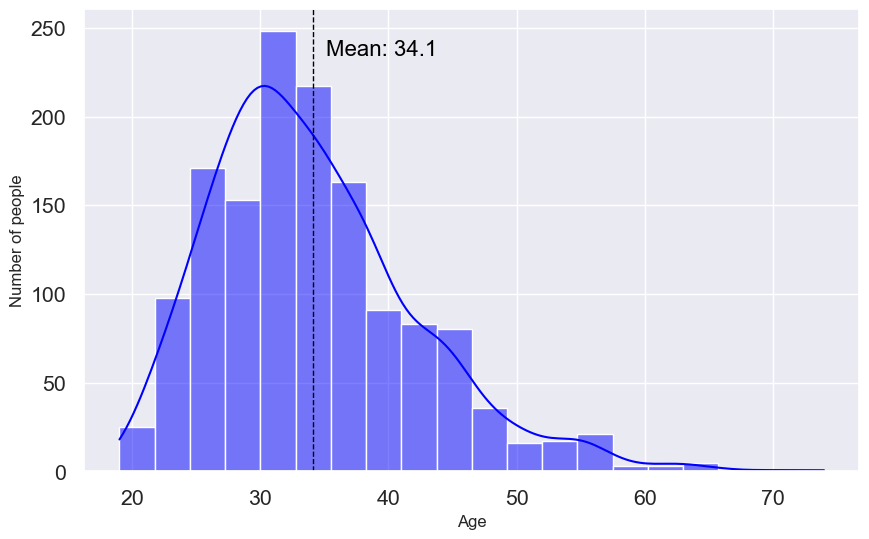

The Mean Age of the respondents is: 34.1
The Most Frequent Age Range is: 27-30


In [155]:
# Calculating the mean age
mean_age = df_no_drp['age'].mean()
age_bins = pd.cut(df_no_drp['age'], bins=20)
age_bin_counts = age_bins.value_counts().sort_index()

# Calculating the age range with the most people
most_frequent_age_range = age_bin_counts.idxmax()
most_frequent_age_range_start = most_frequent_age_range.left
most_frequent_age_range_end = most_frequent_age_range.right

# Plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_no_drp['age'], bins=20, kde=True, color='blue')
# plt.title('Age Distribution of People', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.axvline(mean_age, color='black', linestyle='dashed', linewidth=1)
plt.text(mean_age + 1, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_age:.1f}', color='black')

plt.show()
print(f'The Mean Age of the respondents is: {mean_age:.1f}')
print(f'The Most Frequent Age Range is: {int(most_frequent_age_range_start)}-{int(most_frequent_age_range_end)}')


### 2. Employees with Health Benefits 

In [156]:
total_emp=[0 for i in range(6)]
for i in range(len(df['Total_employees'])):
        if(df.iloc[i,1]==1): 
           total_emp[0]+=1
        if(df.iloc[i,1]==2): 
           total_emp[1]+=1
        if(df.iloc[i,1]==3): 
           total_emp[2]+=1
        if(df.iloc[i,1]==4): 
           total_emp[3]+=1
        if(df.iloc[i,1]==5): 
           total_emp[4]+=1
        if(df.iloc[i,1]==6): 
           total_emp[5]+=1

In [157]:
mh_coverage=[0 for i in range(6)]
for i in range(len(df['Total_employees'])):
        if(df.iloc[i,1]==1 and df.iloc[i,3]==3): 
            mh_coverage[0]+=1
        if(df.iloc[i,1]==2 and df.iloc[i,3]==3): 
            mh_coverage[1]+=1
        if(df.iloc[i,1]==3 and df.iloc[i,3]==3): 
            mh_coverage[2]+=1
        if(df.iloc[i,1]==4 and df.iloc[i,3]==3): 
            mh_coverage[3]+=1
        if(df.iloc[i,1]==5 and df.iloc[i,3]==3): 
            mh_coverage[4]+=1
        if(df.iloc[i,1]==6 and df.iloc[i,3]==3): 
            mh_coverage[5]+=1  

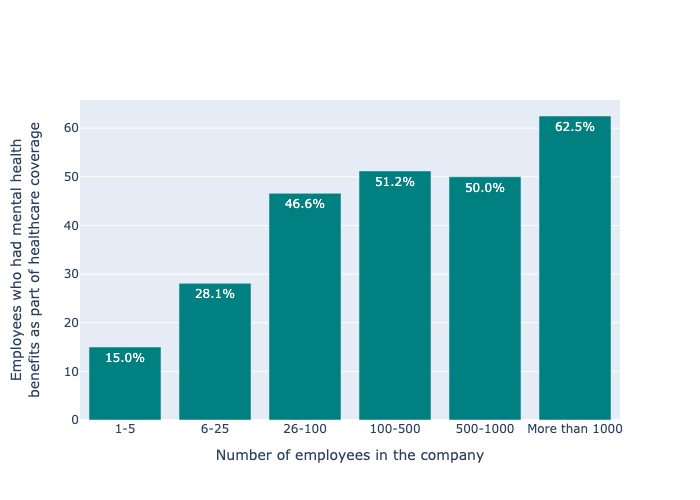

In [158]:
mh_cov_per=[0 for i in range(6)]
mh_cov_per[0]=round(mh_coverage[0]/total_emp[0]*100,1)
mh_cov_per[1]=round(mh_coverage[1]/total_emp[1]*100,1)
mh_cov_per[2]=round(mh_coverage[2]/total_emp[2]*100,1)
mh_cov_per[3]=round(mh_coverage[3]/total_emp[3]*100,1)
mh_cov_per[4]=round(mh_coverage[4]/total_emp[4]*100,1)
mh_cov_per[5]=round(mh_coverage[5]/total_emp[5]*100,1)

emp_age = ['1-5', '6-25', '26-100','100-500', '500-1000', 'More than 1000' ]
fig = go.Figure()
fig.add_trace(go.Bar(x=emp_age, y=mh_cov_per,text=[str(x)+"%" for x in mh_cov_per],marker=dict(color='teal')))
fig.update_layout(xaxis_title='Number of employees in the company', yaxis_title='Employees who had mental health<br>benefits as part of healthcare coverage')
fig.show("png")


In [159]:
import scipy.stats as stats

# Creating a contingency table
contingency_table = pd.crosstab(df['Total_employees'], df['Mental_health_coverage'])

# Displaying the contingency table
print("Contingency Table:")
print(contingency_table)

# Performing the Chi-Square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Displaying the results
print("\nChi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpreting the p-value
alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between company size and the provision of mental health benefits (reject the null hypothesis).")
else:
    print("\nThere is no significant association between company size and the provision of mental health benefits (fail to reject the null hypothesis).")


Contingency Table:
Mental_health_coverage   0   1   2    3
Total_employees                        
1                       12  11  28    9
2                       24  60  67   59
3                       11  92  53  136
4                       12  79  30  127
5                        5  26   9   40
6                       19  51  26  160

Chi-Square Statistic: 143.74456100934023
Degrees of Freedom: 15
P-Value: 4.190930310626557e-23

Expected Frequencies Table:
Mental_health_coverage          0          1          2           3
Total_employees                                                    
1                        4.345550  16.701571  11.151832   27.801047
2                       15.209424  58.455497  39.031414   97.303665
3                       21.148342  81.280977  54.272251  135.298429
4                       17.961606  69.033159  46.094241  114.910995
5                        5.794066  22.268761  14.869110   37.068063
6                       18.541012  71.260035  47.581152  118

### 3. Awareness of Mental Health Care Options

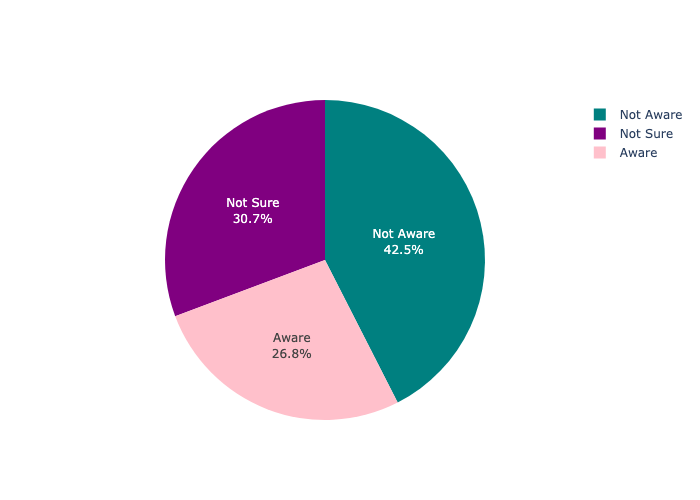

In [160]:
awareness = ['Not Sure', 'Not Aware', 'Aware']
aware_values = []
labels = list(set(df['Awareness_of_options_under_coverage'].values))
for i in labels:
    new = df[df.Awareness_of_options_under_coverage == i]
    aware_values.append(new.shape[0])

fig = go.Figure(data=[go.Pie(labels=labels, values=aware_values)])
fig.update_traces(labels=awareness, textinfo='percent+label', marker=dict(colors=['purple', 'teal', 'pink']))
fig.show("png")



### 4. Gender proportions of employees in different regions

<Figure size 1600x500 with 0 Axes>

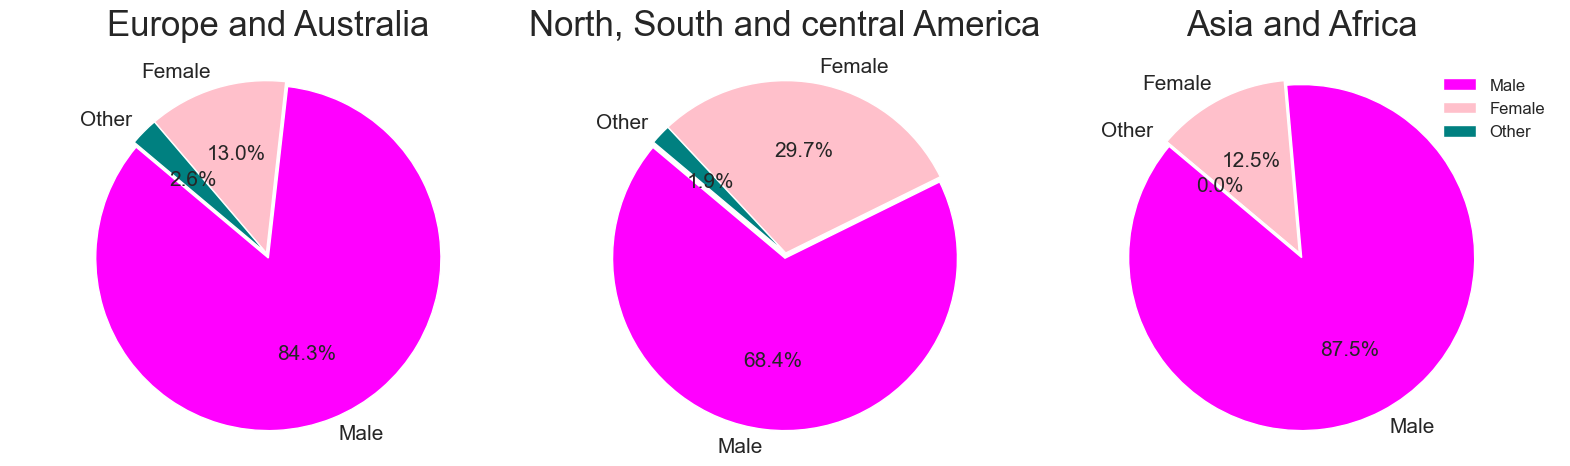

In [161]:
df_no_drp['country_live'].replace(to_replace = ['USA','Canada','Brazil','Chile','Colombia','Mexico','Argentina','Guatemala','Costa Rica','Venezuela','Ecuador'], value = "North South and central America", inplace = True)
df_no_drp['country_live'].replace(to_replace = ['New Zealand','Australia','UK','Germany','Netherlands','Sweden','France','Ireland','Switzerland','Finland','Denmark','Bulgaria','Italy','Belgium','Spain','Poland','Austria','Romania','Czech Republic','Norway','Estonia','Bosnia and Herzegovina','Lithuania','Slovakia','Serbia','Greece','Hungary'], value = "Europe and Australia", inplace = True)
df_no_drp['country_live'].replace(to_replace = ['Other','India','Russia','South Africa','Pakistan','Afghanistan','Israel','Japan','Algeria','Taiwan','Bangladesh','Brunei','China','Iran','Vietnam'], value = "Asia and Africa", inplace = True)

# Pie Chart
plt.rcParams['font.size'] = 18
plt.figure(figsize = (16,5))
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
# fig.suptitle('Gender proportions of employees in different regions', fontsize = 25, y=1.08)

#For Eurpoe and Australia
all_techs = df_no_drp[df_no_drp['country_live'] == 'Europe and Australia']['gender'].count()
males = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['gender'] == 1.0)]['gender'].count()
females = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['gender'] == 2.0)]['gender'].count()
other = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['gender'] == 3.0)]['gender'].count()
labels = ['Male', 'Female', 'Other']
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['magenta', 'pink', 'teal']
explode = (0.03, 0, 0)  # explode 1st slice
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontsize': 15})
ax1.axis('equal')
ax1.set_title('Europe and Australia', pad = 20, fontsize = 25)


#For America
all_techs = df_no_drp[df_no_drp['country_live'] == 'North South and central America']['gender'].count()
males = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['gender'] == 1.0)]['gender'].count()
females = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['gender'] == 2.0)]['gender'].count()
other = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['gender'] == 3.0)]['gender'].count()

labels = ['Male', 'Female', 'Other']
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['magenta', 'pink', 'teal']
explode = (0.03, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontsize': 15})
ax2.axis('equal')
ax2.set_title('North, South and central America', pad = 20, fontsize = 25)

#For Asia Africa and Australia
all_techs = df_no_drp[df_no_drp['country_live'] == 'Asia and Africa']['gender'].count()
males = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['gender'] == 1.0)]['gender'].count()
females = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['gender'] == 2.0)]['gender'].count()
other = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['gender'] == 3.0)]['gender'].count()

labels = ['Male', 'Female', 'Other']
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['magenta', 'pink', 'teal']
explode = (0.03, 0, 0)  

legends = ['Male', 'Female', 'Other']
ax3.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontsize': 15})
ax3.axis('equal')
ax3.set_title('Asia and Africa', pad = 20, fontsize = 25)
ax3.legend(labels, loc="best", prop={'size': 12})
plt.savefig('gen_prop.png')

### 5. Employees' readiness to disclose mental illness to friends and family 

<Figure size 1600x500 with 0 Axes>

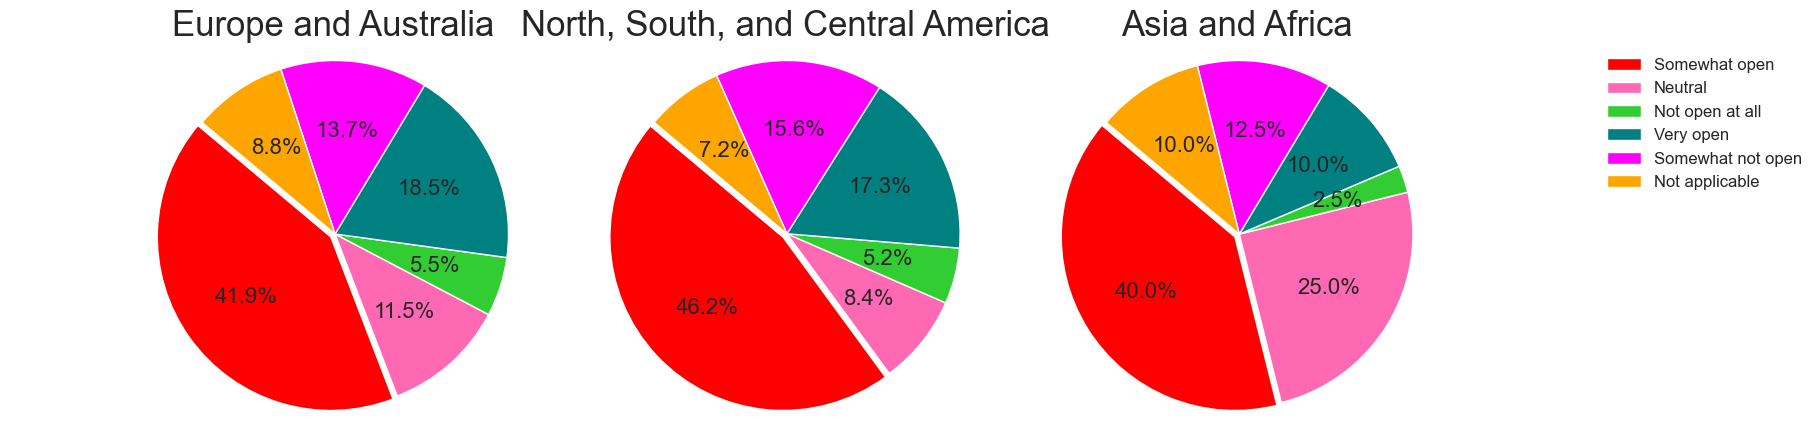

In [162]:
# Set font size for the entire plot
plt.rcParams['font.size'] = 12
plt.figure(figsize=(16, 5))

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace=-0.3)

colors = ['red', '#FF69B4', '#32CD32', '#008080', '#FF00FF', '#FFA500']
labels = ['Somewhat open', 'Neutral', 'Not open at all', 'Very open', 'Somewhat not open', 'Not applicable']

# Europe and Australia
all_techs = df_no_drp[df_no_drp['country_live'] == 'Europe and Australia']['share_w_friends_fam'].count()
somewhat_op = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'].count()
neutral = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Neutral')]['share_w_friends_fam'].count()
v_open = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Very open')]['share_w_friends_fam'].count()
not_op = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Not open at all')]['share_w_friends_fam'].count()
somewhat_not_op = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Somewhat not open')]['share_w_friends_fam'].count()
not_app = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Not applicable to me (I do not have a mental illness)')]['share_w_friends_fam'].count()

sizes = [somewhat_op/all_techs, neutral/all_techs, not_op/all_techs, v_open/all_techs, somewhat_not_op/all_techs, not_app/all_techs]
explode = (0.03, 0, 0, 0, 0, 0)  # Explode the 1st slice

ax1.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontsize': 16})
ax1.axis('equal')
ax1.set_title('Europe and Australia', pad=3, fontsize=25)

# North, South, and Central America
all_techs = df_no_drp[df_no_drp['country_live'] == 'North South and central America']['share_w_friends_fam'].count()
somewhat_op = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'].count()
neutral = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Neutral')]['share_w_friends_fam'].count()
v_open = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Very open')]['share_w_friends_fam'].count()
not_op = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Not open at all')]['share_w_friends_fam'].count()
somewhat_not_op = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Somewhat not open')]['share_w_friends_fam'].count()
not_app = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Not applicable to me (I do not have a mental illness)')]['share_w_friends_fam'].count()

sizes = [somewhat_op/all_techs, neutral/all_techs, not_op/all_techs, v_open/all_techs, somewhat_not_op/all_techs, not_app/all_techs]
explode = (0.03, 0, 0, 0, 0, 0)

ax2.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontsize': 16})
ax2.axis('equal')
ax2.set_title('North, South, and Central America', pad=3, fontsize=25)

# Asia and Africa
all_techs = df_no_drp[df_no_drp['country_live'] == 'Asia and Africa']['share_w_friends_fam'].count()
somewhat_op = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'].count()
neutral = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Neutral')]['share_w_friends_fam'].count()
v_open = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Very open')]['share_w_friends_fam'].count()
not_op = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Not open at all')]['share_w_friends_fam'].count()
somewhat_not_op = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Somewhat not open')]['share_w_friends_fam'].count()
not_app = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Not applicable to me (I do not have a mental illness)')]['share_w_friends_fam'].count()

sizes = [somewhat_op/all_techs, neutral/all_techs, not_op/all_techs, v_open/all_techs, somewhat_not_op/all_techs, not_app/all_techs]
explode = (0.03, 0, 0, 0, 0, 0)

ax3.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontsize': 16})
ax3.axis('equal')
ax3.set_title('Asia and Africa', pad=3, fontsize=25)

# Correct legend for the last subplot
ax3.legend(labels=labels, loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 12})

plt.show()

### 6. Fear of negative consequences when talking to their employers about mental health concerns 

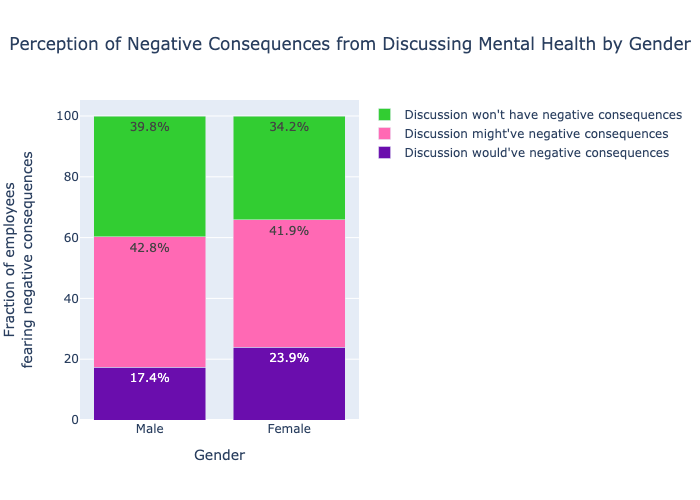

In [163]:
# Initialize lists to store counts for negative consequences
male_neg_cons = [0 for _ in range(3)]
female_neg_cons = [0 for _ in range(3)]

# Loop through the dataframe to count responses
for i in range(len(df['Discussing_mental_health_neg_consequences'])):
    if df.iloc[i, 9] == 0 and df.iloc[i, 41] == 1: 
        male_neg_cons[0] += 1
    if df.iloc[i, 9] == 1 and df.iloc[i, 41] == 1: 
        male_neg_cons[1] += 1
    if df.iloc[i, 9] == 2 and df.iloc[i, 41] == 1: 
        male_neg_cons[2] += 1
    if df.iloc[i, 9] == 0 and df.iloc[i, 41] == 2: 
        female_neg_cons[0] += 1
    if df.iloc[i, 9] == 1 and df.iloc[i, 41] == 2: 
        female_neg_cons[1] += 1
    if df.iloc[i, 9] == 2 and df.iloc[i, 41] == 2: 
        female_neg_cons[2] += 1  

# Calculate the sum of the counts for normalization
neg_cons_male_sum = sum(male_neg_cons)
neg_cons_fem_sum = sum(female_neg_cons)

# Calculate percentages
for i in range(3):
    male_neg_cons[i] = round((male_neg_cons[i] / neg_cons_male_sum) * 100, 1)
    female_neg_cons[i] = round((female_neg_cons[i] / neg_cons_fem_sum) * 100, 1)

# Create a list of the percentages for plotting
neg_con = np.array([male_neg_cons, female_neg_cons]).T
neg_cons_list = neg_con.tolist()

# Define the x-axis categories
x = ['Male', 'Female']

# Define the colors associated with mental health
colors = ['#6A0DAD', '#FF69B4', '#32CD32', '#008080', '#FF00FF', '#FFA500']

# Create the stacked bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=x, 
    y=neg_cons_list[0], 
    name="Discussion would've negative consequences",
    text=[str(y) + "%" for y in neg_cons_list[0]],
    marker_color=colors[0]  # Purple
))

fig.add_trace(go.Bar(
    x=x, 
    y=neg_cons_list[1],
    name="Discussion might've negative consequences",
    text=[str(y) + "%" for y in neg_cons_list[1]],
    marker_color=colors[1]  # Pink
))

fig.add_trace(go.Bar(
    x=x, 
    y=neg_cons_list[2],
    name="Discussion won't have negative consequences",
    text=[str(y) + "%" for y in neg_cons_list[2]],
    marker_color=colors[2]  # Green
))

# Update layout for the figure
fig.update_layout(
    barmode='stack', 
    xaxis_title='Gender', 
    yaxis_title='Fraction of employees<br>fearing negative consequences',
    title='Perception of Negative Consequences from Discussing Mental Health by Gender',
    title_x=0.5
)

# Show the plot
fig.show("png")

### 7. Effect of Employers formal discussion

<Figure size 1600x500 with 0 Axes>

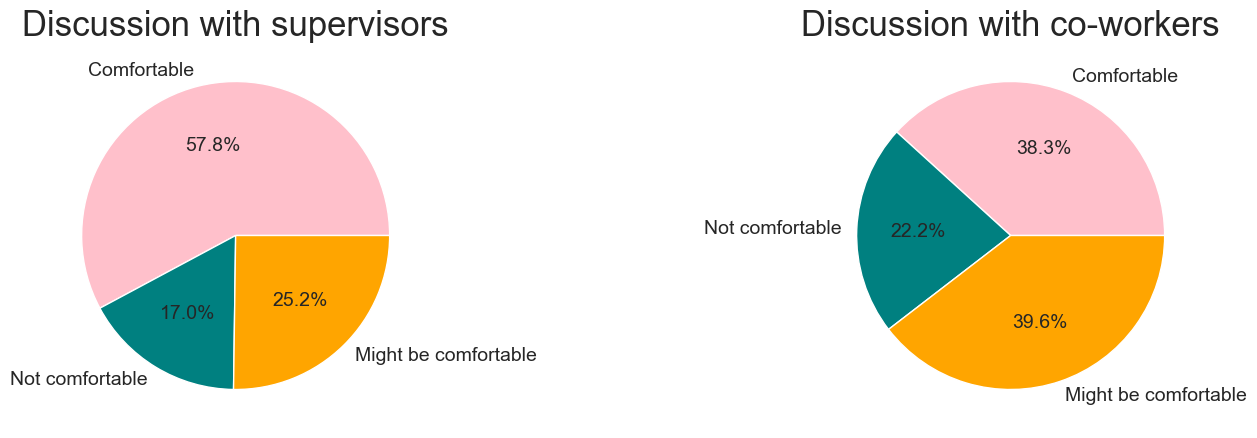

In [164]:
plt.rcParams['font.size'] = 12
plt.figure(figsize = (16,5))
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace =0)
# fig.suptitle("Effect of formal discussion of mental health by employers on the employees' comfort in discussing mental health issues with their supervisors and co-workers", fontsize = 20, y=1.08)

#comfort with supervisor
all_techs = df_no_drp[df_no_drp['Employers_discussion_on_mental_health'] == 'Yes']['Comfort_discussing_with_supervisor'].count()
comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Yes')]['Comfort_discussing_with_supervisor'].count()
not_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'No')]['Comfort_discussing_with_supervisor'].count()
maybe_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Maybe')]['Comfort_discussing_with_supervisor'].count()
sizes = [comf/all_techs, not_comf/all_techs, maybe_comf/all_techs]
emp_cnt = ['Comfortable', 'Not comfortable', 'Might be comfortable']
colors = ['pink', 'teal', 'orange']
ax1.pie(sizes, labels = emp_cnt, colors= colors,autopct='%1.1f%%', textprops={'fontsize': 14})
ax1.set_title('Discussion with supervisors', pad =3, fontsize = 25)
#plt.title('Fraction of employees')

#comfort with co-workers
all_techs = df_no_drp[df_no_drp['Employers_discussion_on_mental_health'] == 'Yes']['Comfort_discussing_with_coworkers'].count()
comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_coworkers'] == 'Yes')]['Comfort_discussing_with_coworkers'].count()
not_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_coworkers'] == 'No')]['Comfort_discussing_with_coworkers'].count()
maybe_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_coworkers'] == 'Maybe')]['Comfort_discussing_with_coworkers'].count()
sizes = [comf/all_techs, not_comf/all_techs, maybe_comf/all_techs]
emp_cnt = ['Comfortable', 'Not comfortable', 'Might be comfortable']
colors = ['pink', 'teal', 'orange']
ax2.pie(sizes, labels = emp_cnt, colors= colors,autopct='%1.1f%%', textprops={'fontsize': 14})
ax2.set_title('Discussion with co-workers', pad =3, fontsize = 25)

plt.savefig('disc_eff_comf.png')

### 8. Impact of Mental Health on Work Performance

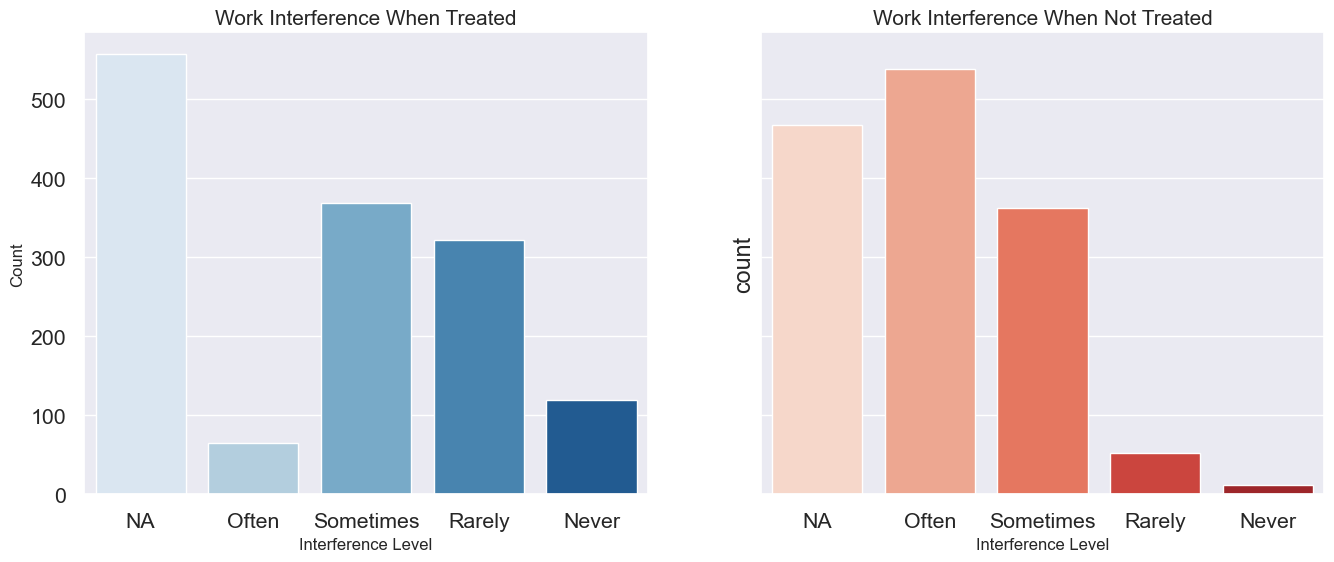

In [165]:
# Replace "Not applicable to me" with "NA"
df_no_drp['work_interference_treatment'] = df_no_drp['work_interference_treatment'].replace('Not applicable to me', 'NA')
df_no_drp['work_interference_no_treatment'] = df_no_drp['work_interference_no_treatment'].replace('Not applicable to me', 'NA')

category_order = ['NA', 'Often', 'Sometimes', 'Rarely', 'Never']

# Plot the work interference when treated and untreated
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Work interference when treated
sns.countplot(ax=axes[0], x='work_interference_treatment', data=df_no_drp, palette='Blues', order=category_order)
axes[0].set_title('Work Interference When Treated', fontsize=15)
axes[0].set_xlabel('Interference Level', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Work interference when not treated
sns.countplot(ax=axes[1], x='work_interference_no_treatment', data=df_no_drp, palette='Reds', order=category_order)
axes[1].set_title('Work Interference When Not Treated', fontsize=15)
axes[1].set_xlabel('Interference Level', fontsize=12)

plt.show()


### 9. Mental Health Issues and Family History

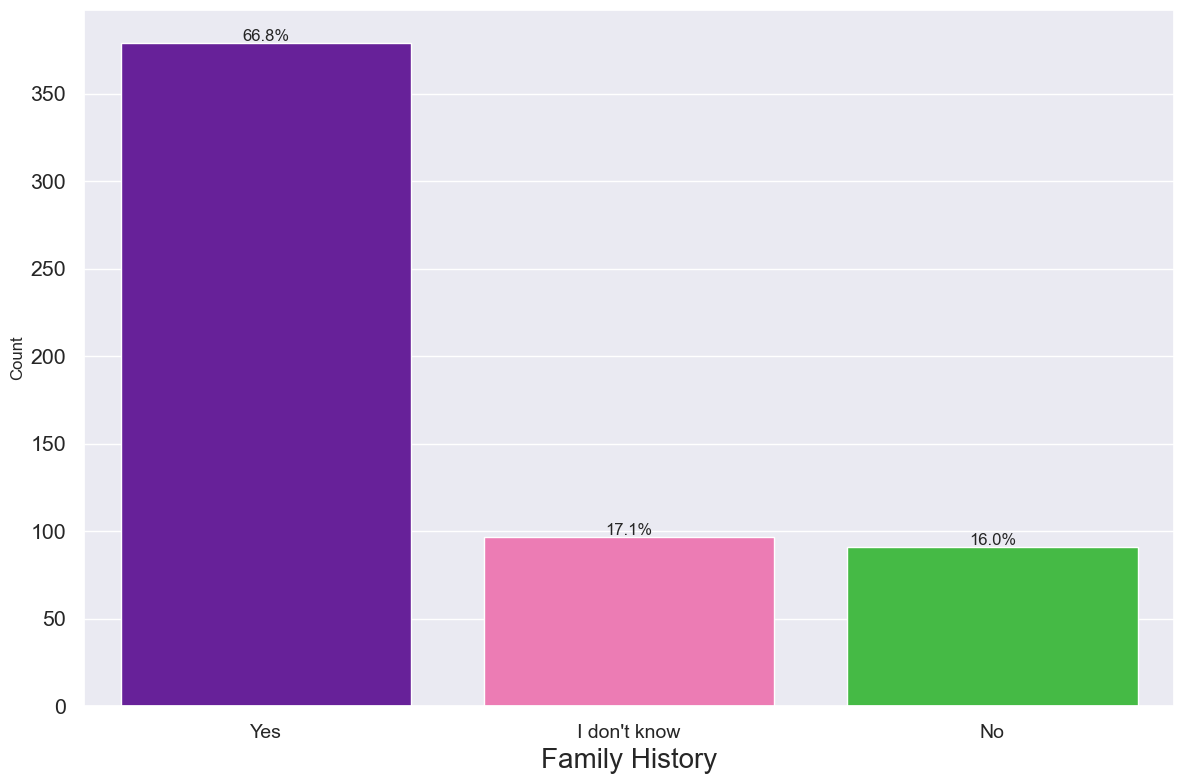

In [166]:
# Number of people who reported mental health issues based on their family history
family_history_mental_health_counts = df[df['diagnosed_prof'] == 1]['fam_hist'].value_counts()

# Calculate the percentages
total_count = family_history_mental_health_counts.sum()
family_history_percentages = (family_history_mental_health_counts / total_count) * 100
colors = ['#6A0DAD', '#FF69B4', '#32CD32']

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=family_history_mental_health_counts.index, 
    y=family_history_mental_health_counts.values, 
    palette=colors, 
    order=[2, 1, 0]  
)

for index, value in enumerate(family_history_mental_health_counts.values):
    percentage = f'{family_history_percentages.iloc[index]:.1f}%'
    ax.text(index, value + 1, percentage, ha='center', fontsize=12)
plt.xlabel('Family History', fontsize=20)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Yes', 'I don\'t know', 'No'], fontsize=14)  # Ensure labels match the data order
plt.tight_layout()
plt.show()

# Machine Learning models

In order to predict the employees' possibility of being diagnosed with a mental health issue, different prediction models are implemented. The predictions are obtained by classifying the employees into 2 classes: ‘diagnosed for mental health issue by a medical professional’ and ‘not diagnosed for mental health issue by a medical professional’. The classification was done based on the target variable, ‘Have you been diagnosed with a mental health condition by a medical professional?’. 80 % of the data set was used for training and 20 % for testing. 


### 1.Neural Network

In [167]:
np.random.seed(2222)
tf.random.set_seed(2222)

# Building the neural network model
def nn_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning using optuna
def objective(trial):
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop'])
    batch_size = trial.suggest_int('batch_size', 10, 20)
    epochs = trial.suggest_int('epochs', 50, 100)
    model = KerasClassifier(
        model=nn_model, 
        optimizer=optimizer,
        batch_size=batch_size,
        epochs=epochs,
        verbose=0,
        random_state=2222
    )

    # Training the Neural network model
    model.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, (model.predict(X_test) > 0.5).astype("int32"))
    return accuracy

# Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Training the final model with best parameters
best_params = study.best_params
best_nn = KerasClassifier(
    model=nn_model, 
    optimizer=best_params['optimizer'],
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    verbose=0,
    random_state=2222
)
best_nn.fit(X_train, Y_train)

# Evaluation
Y_pred_nn = (best_nn.predict(X_test) > 0.5).astype("int32")
accuracy_nn = accuracy_score(Y_test, Y_pred_nn)
f1_nn = f1_score(Y_test, Y_pred_nn, average="macro")
p_nn = precision_score(Y_test, Y_pred_nn, average="macro")
r_nn = recall_score(Y_test, Y_pred_nn, average="macro")

# Calculating additional metrics
mae_nn = mean_absolute_error(Y_test, Y_pred_nn)
mse_nn = mean_squared_error(Y_test, Y_pred_nn)
rmse_nn = np.sqrt(mse_nn)

# Printing the results
print("accuracy = ", 100 * accuracy_nn)
print("p = ", p_nn)
print("r = ", r_nn)
print("f1 = ", f1_nn)
print("MAE = ", mae_nn)
print("MSE = ", mse_nn)
print("RMSE = ", rmse_nn)
print(classification_report(Y_test, Y_pred_nn))


[I 2024-09-01 16:52:49,401] A new study created in memory with name: no-name-2ef72f52-741f-4f04-976f-c6c11afe77fd
[I 2024-09-01 16:52:54,542] Trial 0 finished with value: 0.8739130434782608 and parameters: {'optimizer': 'rmsprop', 'batch_size': 11, 'epochs': 78}. Best is trial 0 with value: 0.8739130434782608.
[I 2024-09-01 16:52:58,790] Trial 1 finished with value: 0.8652173913043478 and parameters: {'optimizer': 'rmsprop', 'batch_size': 13, 'epochs': 92}. Best is trial 0 with value: 0.8739130434782608.
[I 2024-09-01 16:53:03,005] Trial 2 finished with value: 0.8652173913043478 and parameters: {'optimizer': 'rmsprop', 'batch_size': 15, 'epochs': 100}. Best is trial 0 with value: 0.8739130434782608.
[I 2024-09-01 16:53:06,452] Trial 3 finished with value: 0.8695652173913043 and parameters: {'optimizer': 'rmsprop', 'batch_size': 16, 'epochs': 81}. Best is trial 0 with value: 0.8739130434782608.
[I 2024-09-01 16:53:09,662] Trial 4 finished with value: 0.8652173913043478 and parameters: {

accuracy =  87.82608695652175
p =  0.8799332119004251
r =  0.8785541439806412
f1 =  0.8781779661016949
MAE =  0.12173913043478261
MSE =  0.12173913043478261
RMSE =  0.3489113503954588
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       116
           1       0.85      0.91      0.88       114

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



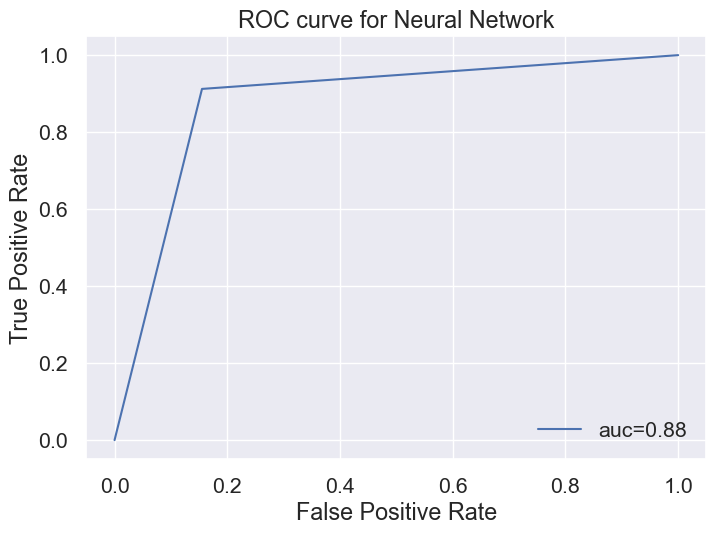

In [168]:
# Plotting the ROC curve
fpr_nn, tpr_nn, _ = roc_curve(Y_test, Y_pred_nn)
auc_nn = roc_auc_score(Y_test, Y_pred_nn)
plt.plot(fpr_nn, tpr_nn, label="auc="+str(round(auc_nn, 2)))
plt.legend(loc=4)
plt.title('ROC curve for Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 2. Support Vector Machine (SVM)

In [169]:
# Initializing the SVC model with fixed parameters
svc = SVC(C=1.0, gamma='scale', kernel='rbf', random_state=2222)

# Training the model
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)

# Confusion Matrix
cm_svc = confusion_matrix(Y_test, Y_pred_svc)
print('Confusion Matrix:')
print(cm_svc)

# Error metrics
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_svc))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_svc))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred_svc)))

# Performance metrics
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
f1_svc = f1_score(Y_test, Y_pred_svc, average="macro")
p_svc = precision_score(Y_test, Y_pred_svc, average="macro")
r_svc = recall_score(Y_test, Y_pred_svc, average="macro")

print("Accuracy:", 100 * accuracy_svc)
print("Precision:", p_svc)
print("Recall:", r_svc)
print("F1 Score:", f1_svc)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_svc))


Confusion Matrix:
[[100  16]
 [ 11 103]]
Mean Absolute Error: 0.11739130434782609
Mean Squared Error: 0.11739130434782609
Root Mean Squared Error: 0.34262414443209643
Accuracy: 88.26086956521739
Precision: 0.883223559694148
Recall: 0.882788868723533
F1 Score: 0.8825887201981433

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       116
           1       0.87      0.90      0.88       114

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



In [170]:
# With Hyperparameter tuning
def objective(trial):
    C = trial.suggest_loguniform('C', 0.1, 100)
    gamma = trial.suggest_loguniform('gamma', 0.001, 1)
    kernel = trial.suggest_categorical('kernel', ['rbf', 'linear'])
    svc = SVC(C=C, gamma=gamma, kernel=kernel, random_state=2222)
    svc.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, svc.predict(X_test))
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Using the best parameters to train the final model
best_params = study.best_params
best_svc = SVC(**best_params, random_state=2222)
best_svc.fit(X_train, Y_train)

Y_pred_svc = best_svc.predict(X_test)
cm_svc = confusion_matrix(Y_test, Y_pred_svc)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_svc))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_svc))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_svc)))
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
f1_svc = f1_score(Y_test, Y_pred_svc, average="macro")
p_svc = precision_score(Y_test, Y_pred_svc, average="macro")
r_svc = recall_score(Y_test, Y_pred_svc, average="macro")

# Evaluation metrics
print("accuracy = ", 100 * accuracy_svc)
print("p = ", p_svc)
print("r = ", r_svc)
print("f1 = ", f1_svc)
print(classification_report(Y_test, Y_pred_svc))


[I 2024-09-01 16:56:02,840] A new study created in memory with name: no-name-63ae9eca-8c0c-4b58-a60f-710b9c17069d
[I 2024-09-01 16:56:02,886] Trial 0 finished with value: 0.9043478260869565 and parameters: {'C': 0.49686432097194716, 'gamma': 0.5779769095507193, 'kernel': 'linear'}. Best is trial 0 with value: 0.9043478260869565.
[I 2024-09-01 16:56:02,992] Trial 1 finished with value: 0.8913043478260869 and parameters: {'C': 2.3198329048594313, 'gamma': 0.11837773544560998, 'kernel': 'linear'}. Best is trial 0 with value: 0.9043478260869565.
[I 2024-09-01 16:56:03,088] Trial 2 finished with value: 0.8695652173913043 and parameters: {'C': 71.41104722597545, 'gamma': 0.05102768587579578, 'kernel': 'rbf'}. Best is trial 0 with value: 0.9043478260869565.
[I 2024-09-01 16:56:03,129] Trial 3 finished with value: 0.9043478260869565 and parameters: {'C': 0.46892681642803724, 'gamma': 0.07331505880836071, 'kernel': 'linear'}. Best is trial 0 with value: 0.9043478260869565.
[I 2024-09-01 16:56:0

Mean Absolute Error: 0.09130434782608696
Mean Squared Error: 0.09130434782608696
Root Mean Squared Error: 0.30216609311120096
accuracy =  90.8695652173913
p =  0.9088949398683912
r =  0.9088021778584392
f1 =  0.9086939261611751
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       116
           1       0.90      0.92      0.91       114

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230



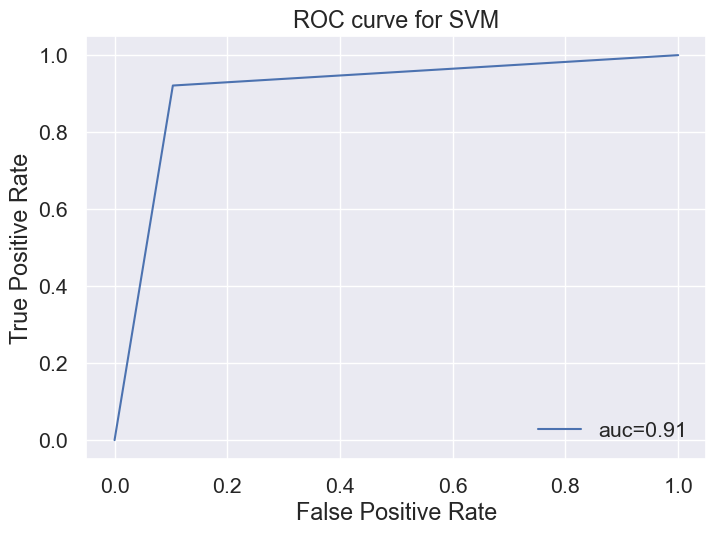

In [171]:
# Plotting the ROC curve
fpr_svc, tpr_svc, _ = roc_curve(Y_test, Y_pred_svc)
auc_svc = roc_auc_score(Y_test, Y_pred_svc)
plt.plot(fpr_svc, tpr_svc, label="auc="+str(round(auc_svc, 2)))
plt.legend(loc=4)
plt.title('ROC curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 3. K Nearest Neighbour  

In [172]:
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn, average="macro")
p_knn = precision_score(Y_test, Y_pred_knn, average="macro")
r_knn = recall_score(Y_test, Y_pred_knn, average="macro")

mae_knn = mean_absolute_error(Y_test, Y_pred_knn)
mse_knn = mean_squared_error(Y_test, Y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

# Printing the results
print("Accuracy:", 100 * accuracy_knn)
print("Precision:", p_knn)
print("Recall:", r_knn)
print("F1 Score:", f1_knn)
print("Mean Absolute Error:", mae_knn)
print("Mean Squared Error:", mse_knn)
print("Root Mean Squared Error:", rmse_knn)
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_knn))


Accuracy: 85.21739130434783
Precision: 0.853030303030303
Recall: 0.852389594676346
F1 Score: 0.8521291884123743
Mean Absolute Error: 0.14782608695652175
Mean Squared Error: 0.14782608695652175
Root Mean Squared Error: 0.3844815820771156

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       116
           1       0.83      0.88      0.85       114

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



In [173]:
# With Hyperparameter tuning
def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 2, 24)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Training the KNN model
    knn.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, knn.predict(X_test))
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Training the final model with best parameters
best_params = study.best_params
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, Y_train)

# Evaluation
Y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn, average="macro")
p_knn = precision_score(Y_test, Y_pred_knn, average="macro")
r_knn = recall_score(Y_test, Y_pred_knn, average="macro")

# Calculating additional metrics
mae_knn = mean_absolute_error(Y_test, Y_pred_knn)
mse_knn = mean_squared_error(Y_test, Y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

# Printing the results
print("accuracy = ", 100 * accuracy_knn)
print("p = ", p_knn)
print("r = ", r_knn)
print("f1 = ", f1_knn)
print("MAE = ", mae_knn)
print("MSE = ", mse_knn)
print("RMSE = ", rmse_knn)
print(classification_report(Y_test, Y_pred_knn))

[I 2024-09-01 16:56:11,219] A new study created in memory with name: no-name-9e98a4aa-fc1c-428b-9cf8-734096dcbdb5
[I 2024-09-01 16:56:11,227] Trial 0 finished with value: 0.8956521739130435 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.8956521739130435.
[I 2024-09-01 16:56:11,235] Trial 1 finished with value: 0.8565217391304348 and parameters: {'n_neighbors': 8}. Best is trial 0 with value: 0.8956521739130435.
[I 2024-09-01 16:56:11,243] Trial 2 finished with value: 0.8695652173913043 and parameters: {'n_neighbors': 15}. Best is trial 0 with value: 0.8956521739130435.
[I 2024-09-01 16:56:11,252] Trial 3 finished with value: 0.8652173913043478 and parameters: {'n_neighbors': 24}. Best is trial 0 with value: 0.8956521739130435.
[I 2024-09-01 16:56:11,260] Trial 4 finished with value: 0.8565217391304348 and parameters: {'n_neighbors': 19}. Best is trial 0 with value: 0.8956521739130435.
[I 2024-09-01 16:56:11,268] Trial 5 finished with value: 0.8260869565217391 and pa

accuracy =  89.56521739130436
p =  0.8973891924711597
r =  0.895946763460375
f1 =  0.8955811138014529
MAE =  0.10434782608695652
MSE =  0.10434782608695652
RMSE =  0.3230291412348993
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       116
           1       0.87      0.93      0.90       114

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



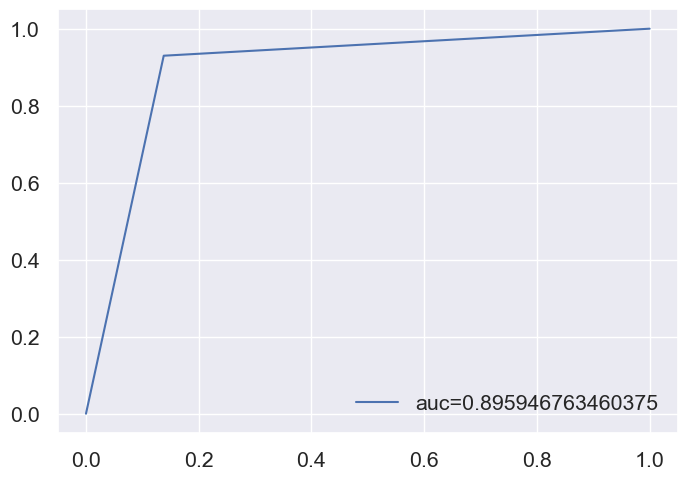

In [174]:
# Plotting the ROC curve
fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_pred_knn)
auc_knn = roc_auc_score(Y_test, Y_pred_knn)
plt.plot(fpr_knn, tpr_knn, label="auc=" + str(auc_knn))
plt.legend(loc=4)
plt.show()


### 4. Logistic Regression 

In [175]:
logreg = LogisticRegression(solver='liblinear', random_state=2222)

# Training the model
logreg.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_logreg = logreg.predict(X_test)

# Confusion Matrix
cm_logreg = confusion_matrix(Y_test, Y_pred_logreg)
print('Confusion Matrix:')
print(cm_logreg)
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_logreg))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_logreg))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred_logreg)))

# Performance metrics
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
f1_logreg = f1_score(Y_test, Y_pred_logreg, average="macro")
p_logreg = precision_score(Y_test, Y_pred_logreg, average="macro")
r_logreg = recall_score(Y_test, Y_pred_logreg, average="macro")

print("Accuracy:", 100 * accuracy_logreg)
print("Precision:", p_logreg)
print("Recall:", r_logreg)
print("F1 Score:", f1_logreg)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_logreg))


Confusion Matrix:
[[100  16]
 [ 13 101]]
Mean Absolute Error: 0.12608695652173912
Mean Squared Error: 0.12608695652173912
Root Mean Squared Error: 0.3550872519842681
Accuracy: 87.39130434782608
Precision: 0.8741018077301264
Recall: 0.8740169388989716
F1 Score: 0.8739106599368609

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       116
           1       0.86      0.89      0.87       114

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [176]:
# With Hyperparameter tuning 
def objective(trial):
    C = trial.suggest_loguniform('C', 0.01, 100)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = 'liblinear' 
    logreg = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=2222)
    # Training the LR the model
    logreg.fit(X_train, Y_train)
    
    accuracy = accuracy_score(Y_test, logreg.predict(X_test))
    return accuracy

# Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Training the final model
best_params = study.best_params
best_logreg = LogisticRegression(**best_params, solver='liblinear', random_state=2222)
best_logreg.fit(X_train, Y_train)

# Evaluation
Y_pred_logreg = best_logreg.predict(X_test)
cm_logreg = confusion_matrix(Y_test, Y_pred_logreg)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_logreg))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_logreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_logreg)))
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
f1_logreg = f1_score(Y_test, Y_pred_logreg, average="macro")
p_logreg = precision_score(Y_test, Y_pred_logreg, average="macro")
r_logreg = recall_score(Y_test, Y_pred_logreg, average="macro")
print("accuracy = ", 100 * accuracy_logreg)
print("p = ", p_logreg)
print("r = ", r_logreg)
print("f1 = ", f1_logreg)
print(classification_report(Y_test, Y_pred_logreg))

[I 2024-09-01 16:56:12,061] A new study created in memory with name: no-name-56213a1d-7852-49dc-a3c2-697502039b57
[I 2024-09-01 16:56:12,078] Trial 0 finished with value: 0.908695652173913 and parameters: {'C': 0.09358349559065393, 'penalty': 'l1'}. Best is trial 0 with value: 0.908695652173913.
[I 2024-09-01 16:56:12,088] Trial 1 finished with value: 0.908695652173913 and parameters: {'C': 0.08245440209720213, 'penalty': 'l1'}. Best is trial 0 with value: 0.908695652173913.
[I 2024-09-01 16:56:12,145] Trial 2 finished with value: 0.8782608695652174 and parameters: {'C': 4.092196353241339, 'penalty': 'l2'}. Best is trial 0 with value: 0.908695652173913.
[I 2024-09-01 16:56:12,162] Trial 3 finished with value: 0.9043478260869565 and parameters: {'C': 0.295803518583418, 'penalty': 'l1'}. Best is trial 0 with value: 0.908695652173913.
[I 2024-09-01 16:56:12,172] Trial 4 finished with value: 0.9043478260869565 and parameters: {'C': 0.026436592968949825, 'penalty': 'l1'}. Best is trial 0 wi

Mean Absolute Error: 0.08695652173913043
Mean Squared Error: 0.08695652173913043
Root Mean Squared Error: 0.29488391230979427
accuracy =  91.30434782608695
p =  0.9140151515151516
r =  0.9132637628554144
f1 =  0.9130171696543378
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       116
           1       0.89      0.94      0.91       114

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230



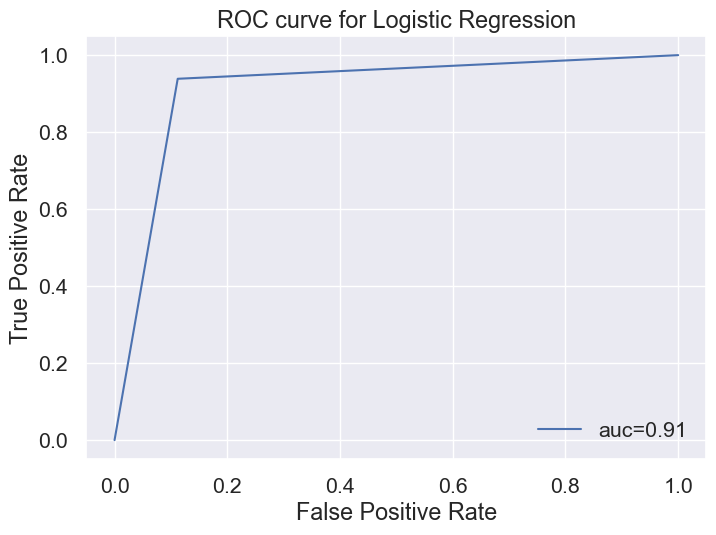

In [177]:
# Plotting the ROC curve
fpr_logreg, tpr_logreg, _ = roc_curve(Y_test, Y_pred_logreg)
auc_logreg = roc_auc_score(Y_test, Y_pred_logreg)
plt.plot(fpr_logreg, tpr_logreg, label="auc="+str(round(auc_logreg, 2)))
plt.legend(loc=4)
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


### 5. Decision Trees

In [178]:
# Initializing the Decision Tree model 
tree = DecisionTreeClassifier(random_state=2222)

# Training the model
tree.fit(X_train, Y_train)
Y_pred_tree = tree.predict(X_test)

# Confusion Matrix
cm_tree = confusion_matrix(Y_test, Y_pred_tree)
print('Confusion Matrix:')
print(cm_tree)

# Error metrics
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_tree))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred_tree)))

# Performance metrics
accuracy_tree = accuracy_score(Y_test, Y_pred_tree)
f1_tree = f1_score(Y_test, Y_pred_tree, average="macro")
p_tree = precision_score(Y_test, Y_pred_tree, average="macro")
r_tree = recall_score(Y_test, Y_pred_tree, average="macro")

print("Accuracy:", 100 * accuracy_tree)
print("Precision:", p_tree)
print("Recall:", r_tree)
print("F1 Score:", f1_tree)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_tree))


Confusion Matrix:
[[103  13]
 [ 25  89]]
Mean Absolute Error: 0.16521739130434782
Mean Squared Error: 0.16521739130434782
Root Mean Squared Error: 0.4064694223485302
Accuracy: 83.47826086956522
Precision: 0.8386182598039216
Recall: 0.8343163944343618
F1 Score: 0.8341681845780207

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       116
           1       0.87      0.78      0.82       114

    accuracy                           0.83       230
   macro avg       0.84      0.83      0.83       230
weighted avg       0.84      0.83      0.83       230



In [179]:
# With hyperparameter tuning 
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 10, 50, step=10, log=False)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20, step=8)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10, step=4)

    # Building the model with the hyperparameters
    tree = DecisionTreeClassifier(
        criterion=criterion, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=2222
    )
    
    # Training the DT model
    tree.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, tree.predict(X_test))
    return accuracy

# Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Training the final model with best params
best_params = study.best_params
best_tree = DecisionTreeClassifier(**best_params, random_state=2222)
best_tree.fit(X_train, Y_train)

# Evaluation
Y_pred_tree = best_tree.predict(X_test)
cm_tree = confusion_matrix(Y_test, Y_pred_tree)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_tree)))
accuracy_tree = accuracy_score(Y_test, Y_pred_tree)
f1_tree = f1_score(Y_test, Y_pred_tree, average="macro")
p_tree = precision_score(Y_test, Y_pred_tree, average="macro")
r_tree = recall_score(Y_test, Y_pred_tree, average="macro")
print("accuracy = ", 100 * accuracy_tree)
print("p = ", p_tree)
print("r = ", r_tree)
print("f1 = ", f1_tree)
print(classification_report(Y_test, Y_pred_tree))

[I 2024-09-01 16:56:13,920] A new study created in memory with name: no-name-44800a16-625e-477e-91f4-5a8e4d65c98b
[I 2024-09-01 16:56:13,928] Trial 0 finished with value: 0.8347826086956521 and parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8347826086956521.
[I 2024-09-01 16:56:13,935] Trial 1 finished with value: 0.8782608695652174 and parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8782608695652174.
[I 2024-09-01 16:56:13,942] Trial 2 finished with value: 0.8739130434782608 and parameters: {'criterion': 'entropy', 'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8782608695652174.
[I 2024-09-01 16:56:13,948] Trial 3 finished with value: 0.8695652173913043 and parameters: {'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 1 with v

Mean Absolute Error: 0.12173913043478261
Mean Squared Error: 0.12173913043478261
Root Mean Squared Error: 0.3489113503954588
accuracy =  87.82608695652175
p =  0.8791666666666667
r =  0.8784785238959467
f1 =  0.8782240375160729
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       116
           1       0.86      0.90      0.88       114

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



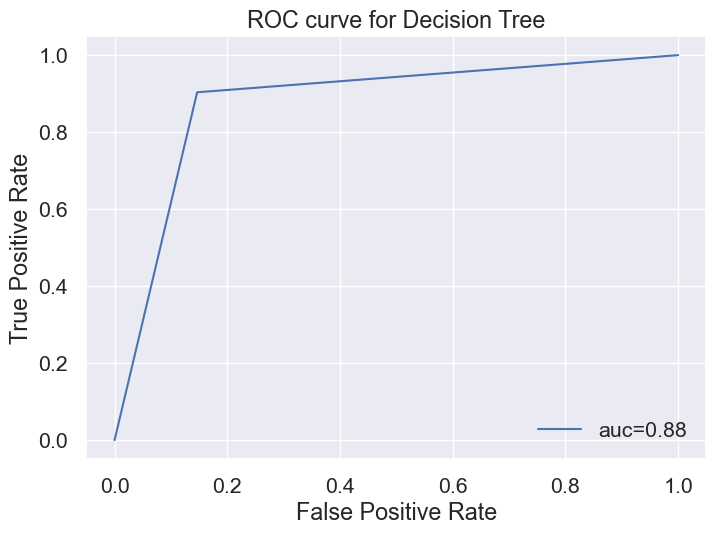

In [180]:
# Plotting the ROC curve
fpr_tree, tpr_tree, _ = roc_curve(Y_test, Y_pred_tree)
auc_tree = roc_auc_score(Y_test, Y_pred_tree)
plt.plot(fpr_tree, tpr_tree, label="auc="+str(round(auc_tree, 2)))
plt.legend(loc=4)
plt.title('ROC curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 6. Random Forest

In [181]:
# Random Forest with Hyperparameter tuning
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 300, step=100)
    max_depth = trial.suggest_int('max_depth', 10, 30, step=10, log=False)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10, step=3)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4, step=1)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    #Building the model
    rf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=2222
    )
    
    # Training the RF model
    rf.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, rf.predict(X_test))
    return accuracy

# Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Training the final model
best_params = study.best_params
best_rf = RandomForestClassifier(**best_params, random_state=2222)
best_rf.fit(X_train, Y_train)

# Evaluation
Y_pred_rf = best_rf.predict(X_test)
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_rf)))
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf, average="macro")
p_rf = precision_score(Y_test, Y_pred_rf, average="macro")
r_rf = recall_score(Y_test, Y_pred_rf, average="macro")

print("accuracy = ", 100 * accuracy_rf)
print("p = ", p_rf)
print("r = ", r_rf)
print("f1 = ", f1_rf)
print(classification_report(Y_test, Y_pred_rf))


[I 2024-09-01 16:56:14,679] A new study created in memory with name: no-name-2db04004-ce44-459a-9db8-0a107670472f
[I 2024-09-01 16:56:14,890] Trial 0 finished with value: 0.908695652173913 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 0 with value: 0.908695652173913.
[I 2024-09-01 16:56:15,204] Trial 1 finished with value: 0.908695652173913 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 0 with value: 0.908695652173913.
[I 2024-09-01 16:56:15,318] Trial 2 finished with value: 0.908695652173913 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 0.908695652173913.
[I 2024-09-01 16:56:15,434] Trial 3 finished with value: 0.9043478260869565 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 8

Mean Absolute Error: 0.09130434782608696
Mean Squared Error: 0.09130434782608696
Root Mean Squared Error: 0.30216609311120096
accuracy =  90.8695652173913
p =  0.9100386685874593
r =  0.9089534180278283
f1 =  0.9086524822695035
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       116
           1       0.88      0.94      0.91       114

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230



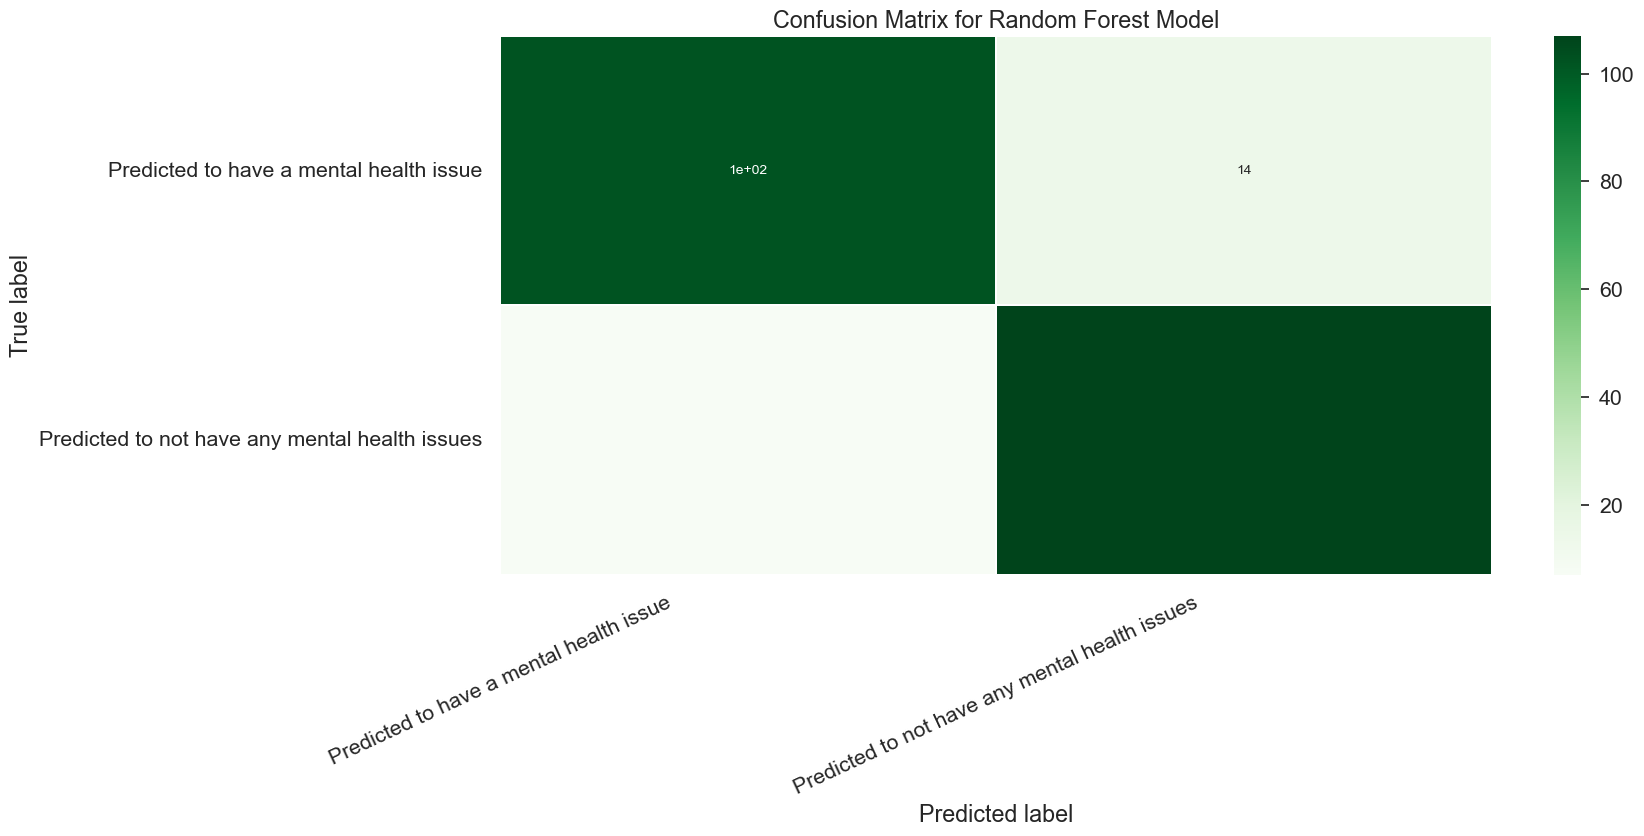

In [182]:
# Building the confusion matrix plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(cm_rf, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
class_names = ['Predicted to have a mental health issue', 'Predicted to not have any mental health issues']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


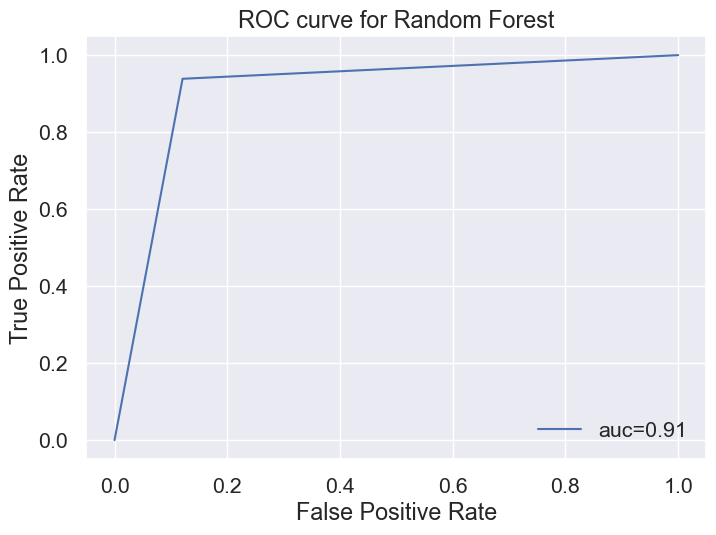

In [183]:
# Plotting the ROC curve
fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_pred_rf)
auc_rf = roc_auc_score(Y_test, Y_pred_rf)
plt.plot(fpr_rf, tpr_rf, label="auc="+str(round(auc_rf, 2)))
plt.legend(loc=4)
plt.title('ROC curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


### 7. ADA Boost

In [184]:
#ADA Boost with hyperparameter tuning
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200, step=50)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 1.0)

    # building the model
    ada = AdaBoostClassifier(
        n_estimators=n_estimators, 
        learning_rate=learning_rate, 
        random_state=2222
    )
    
    # Training the model
    ada.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, ada.predict(X_test))
    return accuracy

# Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Training the final model
best_params = study.best_params
best_ada = AdaBoostClassifier(**best_params, random_state=2222)
best_ada.fit(X_train, Y_train)

# Evaluation
Y_pred_ada = best_ada.predict(X_test)
cm_ada = confusion_matrix(Y_test, Y_pred_ada)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_ada))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_ada))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ada)))
accuracy_ada = accuracy_score(Y_test, Y_pred_ada)
f1_ada = f1_score(Y_test, Y_pred_ada, average="macro")
p_ada = precision_score(Y_test, Y_pred_ada, average="macro")
r_ada = recall_score(Y_test, Y_pred_ada, average="macro")
print("accuracy = ", 100 * accuracy_ada)
print("p = ", p_ada)
print("r = ", r_ada)
print("f1 = ", f1_ada)
print(classification_report(Y_test, Y_pred_ada))


[I 2024-09-01 16:56:26,319] A new study created in memory with name: no-name-d64b7809-5e34-47ad-b6ee-c6b76376c75d
[I 2024-09-01 16:56:26,403] Trial 0 finished with value: 0.9 and parameters: {'n_estimators': 50, 'learning_rate': 0.22289131791844916}. Best is trial 0 with value: 0.9.
[I 2024-09-01 16:56:26,485] Trial 1 finished with value: 0.8913043478260869 and parameters: {'n_estimators': 50, 'learning_rate': 0.027130119487397065}. Best is trial 0 with value: 0.9.
[I 2024-09-01 16:56:26,811] Trial 2 finished with value: 0.8913043478260869 and parameters: {'n_estimators': 200, 'learning_rate': 0.015373149027103551}. Best is trial 0 with value: 0.9.
[I 2024-09-01 16:56:27,057] Trial 3 finished with value: 0.9 and parameters: {'n_estimators': 150, 'learning_rate': 0.0595737997375621}. Best is trial 0 with value: 0.9.
[I 2024-09-01 16:56:27,222] Trial 4 finished with value: 0.9 and parameters: {'n_estimators': 100, 'learning_rate': 0.1369591448902673}. Best is trial 0 with value: 0.9.
[I 

Mean Absolute Error: 0.08695652173913043
Mean Squared Error: 0.08695652173913043
Root Mean Squared Error: 0.29488391230979427
accuracy =  91.30434782608695
p =  0.9140151515151516
r =  0.9132637628554144
f1 =  0.9130171696543378
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       116
           1       0.89      0.94      0.91       114

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230



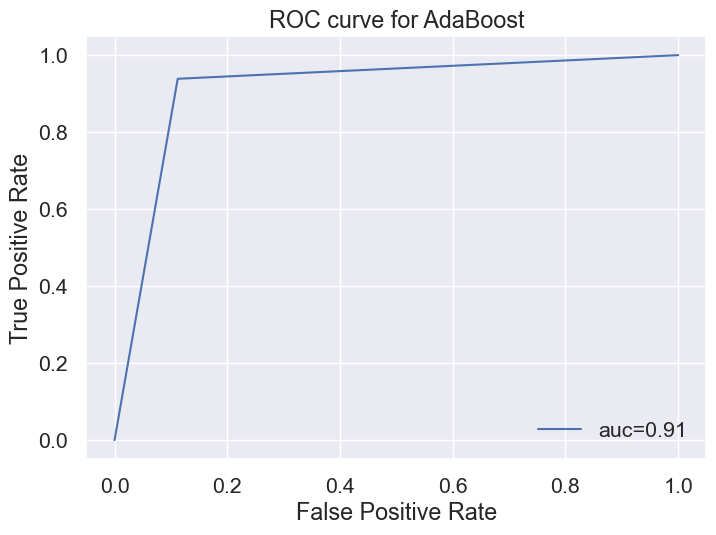

In [185]:
# Plotting the ROC curve
fpr_ada, tpr_ada, _ = roc_curve(Y_test, Y_pred_ada)
auc_ada = roc_auc_score(Y_test, Y_pred_ada)
plt.plot(fpr_ada, tpr_ada, label="auc="+str(round(auc_ada, 2)))
plt.legend(loc=4)
plt.title('ROC curve for AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


### 8. XG Boost

Mean Absolute Error: 0.1
Mean Squared Error: 0.1
Root Mean Squared Error: 0.31622776601683794
accuracy =  90.0
p =  0.9006359300476947
r =  0.9001814882032668
f1 =  0.8999829838724924
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       116
           1       0.88      0.92      0.90       114

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



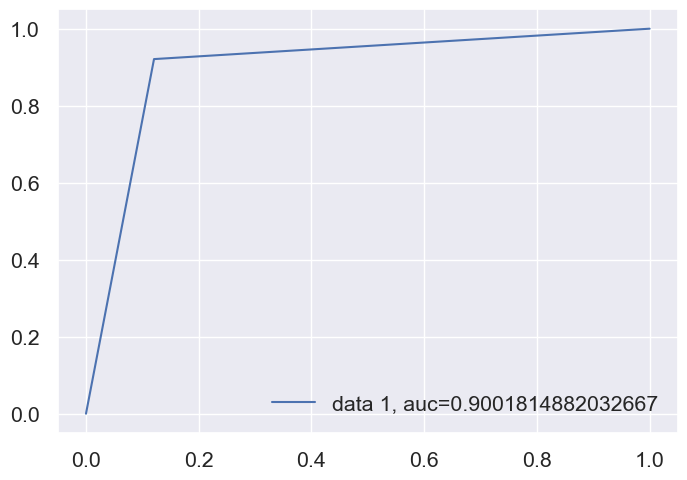

In [186]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(random_state=2222)
xgboost.fit(X_train,Y_train)
Y_pred_xg = xgboost.predict(X_test)

# Building the Confusion Matrix 
cm_xg = confusion_matrix(Y_test, Y_pred_xg)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_xg))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_xg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_xg)))


accuracy_xg=accuracy_score(Y_test, Y_pred_xg)
f1_xg=f1_score(Y_test, Y_pred_xg, average="macro")
p_xg=precision_score(Y_test, Y_pred_xg, average="macro")
r_xg=recall_score(Y_test, Y_pred_xg, average="macro")
print("accuracy = ",100*accuracy_xg)
print("p = ",p_xg)
print("r = ",r_xg)
print("f1 = ",f1_xg)
print(classification_report(Y_test, Y_pred_xg))
# Plotting an ROC curve
fpr_xg, tpr_xg, _ = metrics.roc_curve(Y_test,  Y_pred_xg)
auc_xg = metrics.roc_auc_score(Y_test,  Y_pred_xg)
plt.plot(fpr_xg,tpr_xg,label="data 1, auc="+str(auc_xg))
plt.legend(loc=4)
plt.show()

Baysian Optimization for XGBoost

Best: 0.9082976954145877 using OrderedDict([('colsample_bytree', 0.5), ('learning_rate', 0.048107796576718403), ('max_depth', 10), ('n_estimators', 60), ('subsample', 0.5)])
Optimized XGBoost accuracy =  90.0
Optimized XGBoost precision =  0.9001966568338249
Optimized XGBoost recall =  0.9001058681185723
Optimized XGBoost f1 =  0.8999981096050965
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       116
           1       0.89      0.91      0.90       114

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



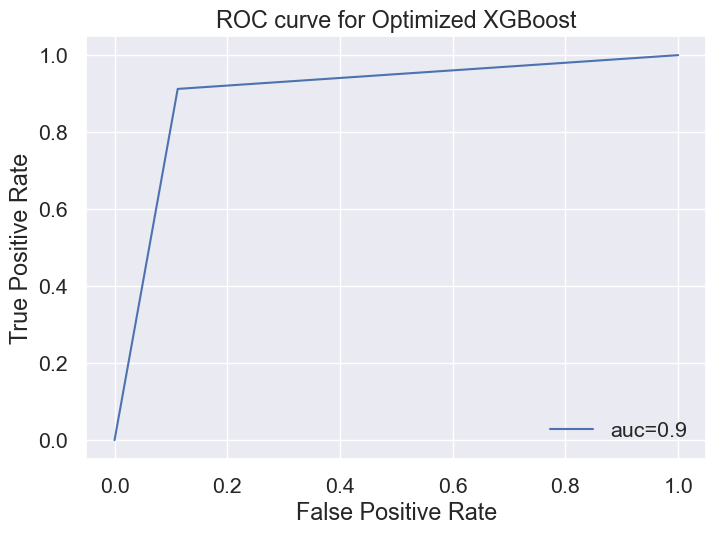

In [187]:
# Defining the parameter grid
param_dist = {
    'learning_rate': (0.01, 0.3),
    'max_depth': (3, 10),
    'n_estimators': (50, 500),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0)
}

# Initializing the XGBoost model
xgboost = XGBClassifier(random_state=2222)

# Bayesian optimization
opt = BayesSearchCV(xgboost, param_dist, n_iter=32, cv=5, random_state=2222)
opt.fit(X_train, Y_train)

print(f"Best: {opt.best_score_} using {opt.best_params_}")

# Predict and evaluate the optimized XGBoost model
Y_pred_xg_opt = opt.best_estimator_.predict(X_test)
accuracy_xg_opt = accuracy_score(Y_test, Y_pred_xg_opt)
f1_xg_opt = f1_score(Y_test, Y_pred_xg_opt, average="macro")
p_xg_opt = precision_score(Y_test, Y_pred_xg_opt, average="macro")
r_xg_opt = recall_score(Y_test, Y_pred_xg_opt, average="macro")


print("Optimized XGBoost accuracy = ", 100 * accuracy_xg_opt)
print("Optimized XGBoost precision = ", p_xg_opt)
print("Optimized XGBoost recall = ", r_xg_opt)
print("Optimized XGBoost f1 = ", f1_xg_opt)
print(classification_report(Y_test, Y_pred_xg_opt))

# Plotting an ROC curve
fpr_xg_opt, tpr_xg_opt, _ = metrics.roc_curve(Y_test, Y_pred_xg_opt)
auc_xg_opt = metrics.roc_auc_score(Y_test, Y_pred_xg_opt)
plt.plot(fpr_xg_opt, tpr_xg_opt, label="auc=" + str(round(auc_xg_opt, 2)))
plt.legend(loc=4)
plt.title('ROC curve for Optimized XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


### 9. Light Gbm

In [188]:
import lightgbm as lgb

# Initializing the LightGBM model 
lgbm = lgb.LGBMClassifier(random_state=2222)

# Training the model
lgbm.fit(X_train, Y_train)
Y_pred_lgbm = lgbm.predict(X_test)

# Confusion Matrix
cm_lgbm = confusion_matrix(Y_test, Y_pred_lgbm)
print('Confusion Matrix:')
print(cm_lgbm)

# Error metrics
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_lgbm))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_lgbm))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred_lgbm)))

# Performance metrics
accuracy_lgbm = accuracy_score(Y_test, Y_pred_lgbm)
f1_lgbm = f1_score(Y_test, Y_pred_lgbm, average="macro")
p_lgbm = precision_score(Y_test, Y_pred_lgbm, average="macro")
r_lgbm = recall_score(Y_test, Y_pred_lgbm, average="macro")

print("Accuracy:", 100 * accuracy_lgbm)
print("Precision:", p_lgbm)
print("Recall:", r_lgbm)
print("F1 Score:", f1_lgbm)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_lgbm))


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Confusion Matrix:
[[102  14]
 [  9 105]]
Mean Absolute Error: 0.1
Mean Squared Error: 0.1
Root Mean Squared Error: 0.31622776601683794
Accuracy: 90.0

In [189]:
# On hyperparameter tuning
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    num_leaves = trial.suggest_int('num_leaves', 20, 40)
    boosting_type = trial.suggest_categorical('boosting_type', ['gbdt', 'dart'])
    min_child_samples = trial.suggest_int('min_child_samples', 10, 30)

    # Defining the model params
    lgbm = lgb.LGBMClassifier(
        n_estimators=n_estimators, 
        learning_rate=learning_rate, 
        num_leaves=num_leaves, 
        boosting_type=boosting_type, 
        min_child_samples=min_child_samples,
        random_state=2222
    )
    
    # Training the LGBM model
    lgbm.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, lgbm.predict(X_test))
    return accuracy

# Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Training the final model
best_params = study.best_params
best_lgbm = lgb.LGBMClassifier(**best_params, random_state=2222)
best_lgbm.fit(X_train, Y_train)

#Evaluation 
Y_pred_lgbm = best_lgbm.predict(X_test)

cm_lgbm = confusion_matrix(Y_test, Y_pred_lgbm)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_lgbm))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_lgbm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lgbm)))
accuracy_lgbm = accuracy_score(Y_test, Y_pred_lgbm)
f1_lgbm = f1_score(Y_test, Y_pred_lgbm, average="macro")
p_lgbm = precision_score(Y_test, Y_pred_lgbm, average="macro")
r_lgbm = recall_score(Y_test, Y_pred_lgbm, average="macro")
print("accuracy = ", 100 * accuracy_lgbm)
print("precision = ", p_lgbm)
print("recall = ", r_lgbm)
print("f1 = ", f1_lgbm)
print(classification_report(Y_test, Y_pred_lgbm))

[I 2024-09-01 16:57:19,627] A new study created in memory with name: no-name-298443be-0542-41d6-a672-f5e6a27aced8
[I 2024-09-01 16:57:19,757] Trial 0 finished with value: 0.908695652173913 and parameters: {'n_estimators': 139, 'learning_rate': 0.02887288535353819, 'num_leaves': 25, 'boosting_type': 'dart', 'min_child_samples': 18}. Best is trial 0 with value: 0.908695652173913.
[I 2024-09-01 16:57:19,788] Trial 1 finished with value: 0.9 and parameters: {'n_estimators': 55, 'learning_rate': 0.1399314501847632, 'num_leaves': 23, 'boosting_type': 'dart', 'min_child_samples': 29}. Best is trial 0 with value: 0.908695652173913.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the t

[I 2024-09-01 16:57:19,823] Trial 2 finished with value: 0.8869565217391304 and parameters: {'n_estimators': 66, 'learning_rate': 0.1540174477098737, 'num_leaves': 28, 'boosting_type': 'gbdt', 'min_child_samples': 21}. Best is trial 0 with value: 0.908695652173913.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-09-01 16:57:19,959] Trial 3 finished with value: 0.8956521739130435 and parameters: {'n_estimators': 84, 'learning_rate': 0.010120108529307255, 'num_leaves': 36, 'boosting_type': 'gbdt', 'min_child_samples': 25}. Best is trial 0 with value: 0.908695652173913.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-01 16:57:20,178] Trial 4 finished with value: 0.908695652173913 and parameters: {'n_estimators': 168, 'learning_rate': 0.09615614014149225, 'num_leaves': 36, 'boosting_type': 'gbdt', 'min_child_samples': 24}. Best is trial 0 with value: 0.908695652173913.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-01 16:57:20,321] Trial 5 finished with value: 0.8913043478260869 and parameters: {'n_estimators': 137, 'learning_rate': 0.1914178504147299, 'num_leaves': 33, 'boosting_type': 'gbdt', 'min_child_samples': 19}. Best is trial 0 with value: 0.908695652173913.
[I 2024-09-01 16:57:20,409] Trial 6 finished with value: 0.9130434782608695 and parameters: {'n_estimators': 83, 'learning_rate': 0.02751582802410749, 'num_leaves': 28, 'boosting_type': 'dart', 'min_child_samples': 11}. Best is trial 6 with value: 0.9130434782608695.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-01 16:57:20,544] Trial 7 finished with value: 0.908695652173913 and parameters: {'n_estimators': 118, 'learning_rate': 0.14726278774749796, 'num_leaves': 33, 'boosting_type': 'gbdt', 'min_child_samples': 21}. Best is trial 6 with value: 0.9130434782608695.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-01 16:57:20,792] Trial 8 finished with value: 0.9043478260869565 and parameters: {'n_estimators': 165, 'learning_rate': 0.03684959500465844, 'num_leaves': 28, 'boosting_type': 'dart', 'min_child_samples': 23}. Best is trial 6 with value: 0.9130434782608695.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-01 16:57:21,146] Trial 9 finished with value: 0.8956521739130435 and parameters: {'n_estimators': 195, 'learning_rate': 0.010012776078790524, 'num_leaves': 22, 'boosting_type': 'dart', 'min_child_samples': 26}. Best is trial 6 with value: 0.9130434782608695.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-01 16:57:21,444] Trial 10 finished with value: 0.8956521739130435 and parameters: {'n_estimators': 95, 'learning_rate': 0.02142269018290866, 'num_leaves': 40, 'boosting_type': 'dart', 'min_child_samples': 10}. Best is trial 6 with value: 0.9130434782608695.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835


[I 2024-09-01 16:57:21,760] Trial 11 finished with value: 0.8913043478260869 and parameters: {'n_estimators': 122, 'learning_rate': 0.032901135245384974, 'num_leaves': 25, 'boosting_type': 'dart', 'min_child_samples': 13}. Best is trial 6 with value: 0.9130434782608695.
[I 2024-09-01 16:57:21,901] Trial 12 finished with value: 0.9130434782608695 and parameters: {'n_estimators': 100, 'learning_rate': 0.02082725393531679, 'num_leaves': 20, 'boosting_type': 'dart', 'min_child_samples': 16}. Best is trial 6 with value: 0.9130434782608695.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostF

[I 2024-09-01 16:57:22,022] Trial 13 finished with value: 0.9130434782608695 and parameters: {'n_estimators': 95, 'learning_rate': 0.017716058864368233, 'num_leaves': 20, 'boosting_type': 'dart', 'min_child_samples': 15}. Best is trial 6 with value: 0.9130434782608695.
[I 2024-09-01 16:57:22,137] Trial 14 finished with value: 0.8956521739130435 and parameters: {'n_estimators': 77, 'learning_rate': 0.06484353197223547, 'num_leaves': 30, 'boosting_type': 'dart', 'min_child_samples': 11}. Best is trial 6 with value: 0.9130434782608695.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostF

[I 2024-09-01 16:57:22,260] Trial 15 finished with value: 0.9260869565217391 and parameters: {'n_estimators': 104, 'learning_rate': 0.05385814009842074, 'num_leaves': 20, 'boosting_type': 'dart', 'min_child_samples': 16}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:22,344] Trial 16 finished with value: 0.8956521739130435 and parameters: {'n_estimators': 50, 'learning_rate': 0.07056454302253046, 'num_leaves': 26, 'boosting_type': 'dart', 'min_child_samples': 13}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostF

[I 2024-09-01 16:57:22,508] Trial 17 finished with value: 0.908695652173913 and parameters: {'n_estimators': 109, 'learning_rate': 0.05218060752933836, 'num_leaves': 32, 'boosting_type': 'dart', 'min_child_samples': 16}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:22,612] Trial 18 finished with value: 0.908695652173913 and parameters: {'n_estimators': 76, 'learning_rate': 0.2610482450488123, 'num_leaves': 23, 'boosting_type': 'dart', 'min_child_samples': 13}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 58
[LightGBM] [Info] [binary:BoostF

[I 2024-09-01 16:57:22,814] Trial 19 finished with value: 0.8956521739130435 and parameters: {'n_estimators': 136, 'learning_rate': 0.039246677352945424, 'num_leaves': 28, 'boosting_type': 'dart', 'min_child_samples': 10}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-01 16:57:23,103] Trial 20 finished with value: 0.9043478260869565 and parameters: {'n_estimators': 154, 'learning_rate': 0.09375777235411331, 'num_leaves': 40, 'boosting_type': 'dart', 'min_child_samples': 17}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:23,216] Trial 21 finished with value: 0.9173913043478261 and parameters: {'n_estimators': 102, 'learning_rate': 0.022765378474420693, 'num_leaves': 20, 'boosting_type': 'dart', 'min_child_samples': 15}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 57
[LightGBM] [Info] [binary:BoostF

[I 2024-09-01 16:57:23,347] Trial 22 finished with value: 0.9 and parameters: {'n_estimators': 108, 'learning_rate': 0.0153367885382307, 'num_leaves': 21, 'boosting_type': 'dart', 'min_child_samples': 14}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:23,457] Trial 23 finished with value: 0.9 and parameters: {'n_estimators': 86, 'learning_rate': 0.046497020780278266, 'num_leaves': 23, 'boosting_type': 'dart', 'min_child_samples': 12}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:23,543] Trial 24 finished with value: 0.9130434782608695 and parameters: {'n_estimators': 65, 'learning_rate': 0.027949281574561478, 'num_leaves': 26, 'boosting_type': 'dart', 'min_child_samples': 15}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostF

[I 2024-09-01 16:57:23,690] Trial 25 finished with value: 0.9043478260869565 and parameters: {'n_estimators': 115, 'learning_rate': 0.013640010681641508, 'num_leaves': 20, 'boosting_type': 'dart', 'min_child_samples': 18}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:23,779] Trial 26 finished with value: 0.8913043478260869 and parameters: {'n_estimators': 101, 'learning_rate': 0.02437980184019176, 'num_leaves': 24, 'boosting_type': 'gbdt', 'min_child_samples': 12}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:23,878] Trial 27 finished with value: 0.9130434782608695 and parameters: {'n_estimators': 87, 'learning_rate': 0.04275139856910008, 'num_leaves': 22, 'boosting_type': 'dart', 'min_child_samples': 20}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostF

[I 2024-09-01 16:57:24,003] Trial 28 finished with value: 0.9043478260869565 and parameters: {'n_estimators': 69, 'learning_rate': 0.05838815152932009, 'num_leaves': 30, 'boosting_type': 'dart', 'min_child_samples': 14}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:24,158] Trial 29 finished with value: 0.9043478260869565 and parameters: {'n_estimators': 131, 'learning_rate': 0.02666413641890882, 'num_leaves': 26, 'boosting_type': 'dart', 'min_child_samples': 18}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing 

[I 2024-09-01 16:57:24,415] Trial 30 finished with value: 0.908695652173913 and parameters: {'n_estimators': 150, 'learning_rate': 0.07894013464613842, 'num_leaves': 36, 'boosting_type': 'dart', 'min_child_samples': 16}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:24,526] Trial 31 finished with value: 0.908695652173913 and parameters: {'n_estimators': 104, 'learning_rate': 0.02077865302066477, 'num_leaves': 20, 'boosting_type': 'dart', 'min_child_samples': 17}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:24,636] Trial 32 finished with value: 0.9130434782608695 and parameters: {'n_estimators': 95, 'learning_rate': 0.013756432274308587, 'num_leaves': 21, 'boosting_type': 'dart', 'min_child_samples': 15}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostF

[I 2024-09-01 16:57:24,779] Trial 33 finished with value: 0.8956521739130435 and parameters: {'n_estimators': 125, 'learning_rate': 0.03167888412025841, 'num_leaves': 22, 'boosting_type': 'dart', 'min_child_samples': 30}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:24,851] Trial 34 finished with value: 0.9173913043478261 and parameters: {'n_estimators': 62, 'learning_rate': 0.018590806555808526, 'num_leaves': 24, 'boosting_type': 'dart', 'min_child_samples': 11}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-01 16:57:24,902] Trial 35 finished with value: 0.9043478260869565 and parameters: {'n_estimators': 62, 'learning_rate': 0.016678412120560506, 'num_leaves': 24, 'boosting_type': 'gbdt', 'min_child_samples': 11}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:25,008] Trial 36 finished with value: 0.9130434782608695 and parameters: {'n_estimators': 59, 'learning_rate': 0.03274730230626333, 'num_leaves': 24, 'boosting_type': 'dart', 'min_child_samples': 11}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 58
[LightGBM] [Info] [binary:BoostF

[I 2024-09-01 16:57:25,125] Trial 37 finished with value: 0.908695652173913 and parameters: {'n_estimators': 76, 'learning_rate': 0.012899298846691078, 'num_leaves': 27, 'boosting_type': 'gbdt', 'min_child_samples': 12}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:25,237] Trial 38 finished with value: 0.8913043478260869 and parameters: {'n_estimators': 83, 'learning_rate': 0.12374027743095466, 'num_leaves': 23, 'boosting_type': 'dart', 'min_child_samples': 10}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:25,309] Trial 39 finished with value: 0.8956521739130435 and parameters: {'n_estimators': 50, 'learning_rate': 0.01799551556734952, 'num_leaves': 29, 'boosting_type': 'gbdt', 'min_child_samples': 27}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 52
[LightGBM] [Info] [binary:BoostF

[I 2024-09-01 16:57:25,454] Trial 40 finished with value: 0.8956521739130435 and parameters: {'n_estimators': 113, 'learning_rate': 0.01186680815772941, 'num_leaves': 21, 'boosting_type': 'dart', 'min_child_samples': 23}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:25,559] Trial 41 finished with value: 0.9043478260869565 and parameters: {'n_estimators': 97, 'learning_rate': 0.022164244752965606, 'num_leaves': 20, 'boosting_type': 'dart', 'min_child_samples': 19}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:25,653] Trial 42 finished with value: 0.9 and parameters: {'n_estimators': 88, 'learning_rate': 0.019783302147828256, 'num_leaves': 22, 'boosting_type': 'dart', 'min_child_samples': 14}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 57
[LightGBM] [Info] [binary:BoostF

[I 2024-09-01 16:57:25,764] Trial 43 finished with value: 0.9130434782608695 and parameters: {'n_estimators': 72, 'learning_rate': 0.025037112430464227, 'num_leaves': 25, 'boosting_type': 'dart', 'min_child_samples': 16}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835


[I 2024-09-01 16:57:25,883] Trial 44 finished with value: 0.908695652173913 and parameters: {'n_estimators': 102, 'learning_rate': 0.03632531565666646, 'num_leaves': 21, 'boosting_type': 'dart', 'min_child_samples': 20}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:26,020] Trial 45 finished with value: 0.8869565217391304 and parameters: {'n_estimators': 91, 'learning_rate': 0.02342462160769525, 'num_leaves': 32, 'boosting_type': 'dart', 'min_child_samples': 22}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 274
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-01 16:57:26,238] Trial 46 finished with value: 0.9043478260869565 and parameters: {'n_estimators': 122, 'learning_rate': 0.02958689918347954, 'num_leaves': 27, 'boosting_type': 'dart', 'min_child_samples': 17}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:26,317] Trial 47 finished with value: 0.9043478260869565 and parameters: {'n_estimators': 82, 'learning_rate': 0.011100963790782062, 'num_leaves': 22, 'boosting_type': 'gbdt', 'min_child_samples': 13}. Best is trial 15 with value: 0.9260869565217391.
[I 2024-09-01 16:57:26,382] Trial 48 finished with value: 0.9043478260869565 and parameters: {'n_estimators': 59, 'learning_rate': 0.016731580288367437, 'num_leaves': 20, 'boosting_type': 'dart', 'min_child_samples': 19}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostF

[I 2024-09-01 16:57:26,556] Trial 49 finished with value: 0.908695652173913 and parameters: {'n_estimators': 108, 'learning_rate': 0.05185340440213645, 'num_leaves': 25, 'boosting_type': 'dart', 'min_child_samples': 14}. Best is trial 15 with value: 0.9260869565217391.


[LightGBM] [Info] Number of positive: 453, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494541 -> initscore=-0.021835
[LightGBM] [Info] Start training from score -0.021835
Mean Absolute Error: 0.07391304347826087
Mean Squared Error: 0.07391304347826087
Root Mean Squared Error: 0.27186953392806057
accuracy =  92.6086956521739
precision =  0.9274774433239821
recall =  0.9263460375075621
f1 =  0.9260520094562648
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       116
           1       0.90      0.96      0.93       114

    accuracy                           0.93 

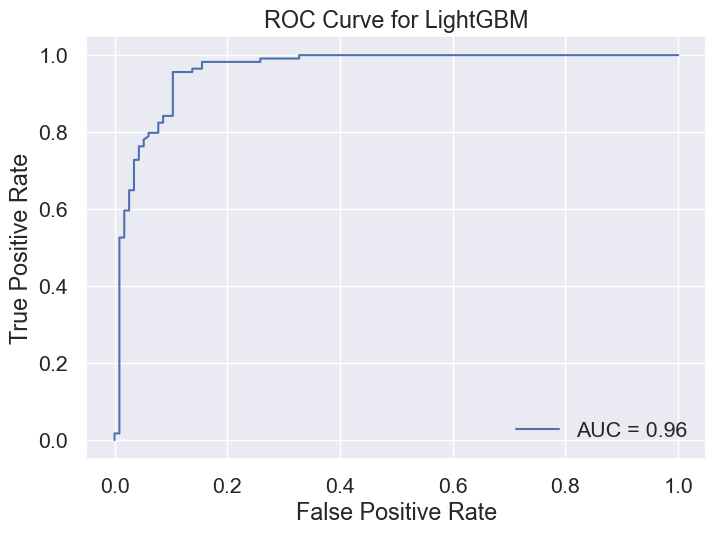

In [190]:
# Plotting an ROC curve
fpr_lgbm, tpr_lgbm, _ = roc_curve(Y_test, best_lgbm.predict_proba(X_test)[:, 1])
auc_lgbm = roc_auc_score(Y_test, best_lgbm.predict_proba(X_test)[:, 1])
plt.plot(fpr_lgbm, tpr_lgbm, label="AUC = " + str(round(auc_lgbm, 2)))
plt.legend(loc=4)
plt.title('ROC Curve for LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


### 10. Gradient Boosting Classifier

In [191]:
# Initializng the Gradient Boosting model 
grad = GradientBoostingClassifier(random_state=2222)

# Training the model
grad.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_grad = grad.predict(X_test)

# Confusion Matrix
cm_grad = confusion_matrix(Y_test, Y_pred_grad)
print('Confusion Matrix:')
print(cm_grad)

# Error metrics
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_grad))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_grad))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred_grad)))

# Performance metrics
accuracy_grad = accuracy_score(Y_test, Y_pred_grad)
f1_grad = f1_score(Y_test, Y_pred_grad, average="macro")
p_grad = precision_score(Y_test, Y_pred_grad, average="macro")
r_grad = recall_score(Y_test, Y_pred_grad, average="macro")

print("Accuracy:", 100 * accuracy_grad)
print("Precision:", p_grad)
print("Recall:", r_grad)
print("F1 Score:", f1_grad)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_grad))


Confusion Matrix:
[[102  14]
 [  8 106]]
Mean Absolute Error: 0.09565217391304348
Mean Squared Error: 0.09565217391304348
Root Mean Squared Error: 0.3092768564135433
Accuracy: 90.43478260869566
Precision: 0.9053030303030303
Recall: 0.9045674531155474
F1 Score: 0.9043188866197716

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       116
           1       0.88      0.93      0.91       114

    accuracy                           0.90       230
   macro avg       0.91      0.90      0.90       230
weighted avg       0.91      0.90      0.90       230



In [192]:
# Hyperparameter tuning
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 300, step=100)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)
    max_depth = trial.suggest_int('max_depth', 3, 5)
    subsample = trial.suggest_uniform('subsample', 0.8, 1.0)

    # Defining model params
    grad = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        random_state=2222
    )
    
    # Training the GB model
    grad.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, grad.predict(X_test))
    return accuracy

# Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_grad = GradientBoostingClassifier(**best_params, random_state=2222)
best_grad.fit(X_train, Y_train)

# Evaluation
Y_pred_grad = best_grad.predict(X_test)

cm_grad = confusion_matrix(Y_test, Y_pred_grad)
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_grad))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_grad))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred_grad)))
accuracy_grad = accuracy_score(Y_test, Y_pred_grad)
f1_grad = f1_score(Y_test, Y_pred_grad, average="macro")
p_grad = precision_score(Y_test, Y_pred_grad, average="macro")
r_grad = recall_score(Y_test, Y_pred_grad, average="macro")
print("accuracy = ", 100 * accuracy_grad)
print("precision = ", p_grad)
print("recall = ", r_grad)
print("f1 = ", f1_grad)
print(classification_report(Y_test, Y_pred_grad))



[I 2024-09-01 16:57:27,125] A new study created in memory with name: no-name-4133366c-4214-4e15-b262-d5779bf74b6a
[I 2024-09-01 16:57:28,179] Trial 0 finished with value: 0.8913043478260869 and parameters: {'n_estimators': 300, 'learning_rate': 0.013764264724007288, 'max_depth': 4, 'subsample': 0.9912203033207571}. Best is trial 0 with value: 0.8913043478260869.
[I 2024-09-01 16:57:29,064] Trial 1 finished with value: 0.9 and parameters: {'n_estimators': 200, 'learning_rate': 0.05773939104249518, 'max_depth': 5, 'subsample': 0.9848207034815938}. Best is trial 1 with value: 0.9.
[I 2024-09-01 16:57:29,374] Trial 2 finished with value: 0.9 and parameters: {'n_estimators': 100, 'learning_rate': 0.0383876159110602, 'max_depth': 4, 'subsample': 0.8288972334314835}. Best is trial 1 with value: 0.9.
[I 2024-09-01 16:57:29,767] Trial 3 finished with value: 0.8913043478260869 and parameters: {'n_estimators': 100, 'learning_rate': 0.04098407288513826, 'max_depth': 5, 'subsample': 0.8076371160764

Mean Absolute Error: 0.08260869565217391
Mean Squared Error: 0.08260869565217391
Root Mean Squared Error: 0.2874172848876245
accuracy =  91.73913043478261
precision =  0.9187580559557207
recall =  0.9176497277676952
f1 =  0.9173522458628842
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       116
           1       0.89      0.95      0.92       114

    accuracy                           0.92       230
   macro avg       0.92      0.92      0.92       230
weighted avg       0.92      0.92      0.92       230



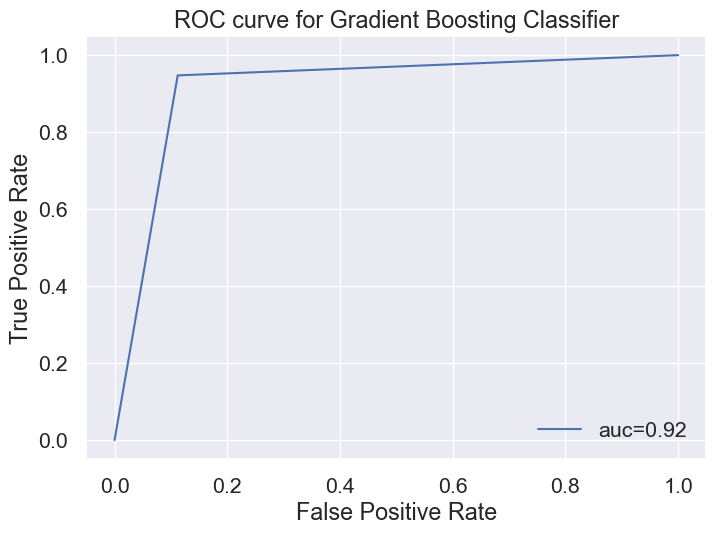

In [193]:
# Plotting an ROC curve
fpr_grad, tpr_grad, _ = roc_curve(Y_test, Y_pred_grad)
auc_grad = roc_auc_score(Y_test, Y_pred_grad)
plt.plot(fpr_grad, tpr_grad, label="auc=" + str(round(auc_grad, 2)))
plt.legend(loc=4)
plt.title('ROC curve for Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


## K Fold Cross Validation

In [194]:
rf = RandomForestClassifier(random_state=2222)
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state=2222)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state=2222)
grad = GradientBoostingClassifier(random_state=2222)
xgboost = XGBClassifier(random_state=2222)

In [195]:
# Define Stratified K Fold
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)

1. Neural Network

In [196]:

# Set random seeds
np.random.seed(2222)
tf.random.set_seed(2222)

# Defining the neural network model
def create_nn_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Ensure Y_train is a numpy array
Y_train_np = np.array(Y_train)

# Define Stratified K Fold
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)

# Prepare for K-Fold Cross Validation
scores = []

# Loop over K-Folds
for train_index, val_index in kf.split(X_train, Y_train_np):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    Y_train_fold, Y_val_fold = Y_train_np[train_index], Y_train_np[val_index]

    # Create and train the model
    model = create_nn_model()
    model.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=10, verbose=0)

    # Make predictions on the validation set
    Y_val_pred = (model.predict(X_val_fold) > 0.5).astype("int32")

    # Calculate accuracy
    accuracy = accuracy_score(Y_val_fold, Y_val_pred)
    scores.append(accuracy)

# Convert list to numpy array for easy manipulation
scores = np.array(scores)

# Printing results
print("Neural Network Cross Validation Scores: Accuracy = {:.2f}% +/- {:.2f}%".format(scores.mean() * 100, scores.std() * 100))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Neural Network Cross Validation Scores: Accuracy = 84.94% +/- 3.96%


2. Support Vector Machine (SVM)

In [197]:
# SVM Cross Validation
svc = SVC(random_state=2222)

kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
svc_score = cross_val_score(svc, X_train, Y_train, cv=kf)
print("SVM Cross Validation Scores are {}".format(svc_score))
print("Average Cross Validation score :{}+/- {}".format(svc_score.mean()*100, svc_score.std()*100))


SVM Cross Validation Scores are [0.87878788 0.83333333 0.95454545 0.8030303  0.83333333 0.86363636
 0.93846154 0.87692308 0.86153846 0.86153846 0.8        0.83076923
 0.89230769 0.84615385]
Average Cross Validation score :86.24542124542127+/- 4.311593423037718


3. K Nearest Neighbours

In [198]:
# K Nearest Neighbour (KNN) Cross Validation
knn_score = cross_val_score(knn, X_train, Y_train, cv=kf)
print("KNN Cross Validation Scores: {}".format(knn_score))
print("Average Cross Validation score :{}+/- {}".format(knn_score.mean()*100, knn_score.std()*100))

KNN Cross Validation Scores: [0.83333333 0.81818182 0.93939394 0.8030303  0.87878788 0.83333333
 0.84615385 0.90769231 0.78461538 0.83076923 0.84615385 0.78461538
 0.87692308 0.83076923]
Average Cross Validation score :84.3839493839494+/- 4.2624254000683015


4. Logistic Regression

In [199]:
# Logistic Regression Cross Validation
logreg_score = cross_val_score(logreg, X_train, Y_train, cv=kf)
print("Logistic Regression Cross Validation Scores: {}".format(logreg_score))
print("Average Cross Validation score :{}+/- {}".format(logreg_score.mean()*100, logreg_score.std()*100))

Logistic Regression Cross Validation Scores: [0.87878788 0.87878788 0.90909091 0.75757576 0.87878788 0.81818182
 0.95384615 0.84615385 0.90769231 0.87692308 0.89230769 0.84615385
 0.92307692 0.86153846]
Average Cross Validation score :87.34931734931736+/- 4.624142192132574


5. Decision Trees 

In [200]:
# Decision Tree Cross Validation
tree_score = cross_val_score(tree, X_train, Y_train, cv=kf)
print("Decision Tree Cross Validation Scores: {}".format(tree_score))
print("Average Cross Validation score :{}+/- {}".format(tree_score.mean()*100, tree_score.std()*100))

Decision Tree Cross Validation Scores: [0.87878788 0.86363636 0.90909091 0.78787879 0.87878788 0.8030303
 0.86153846 0.84615385 0.83076923 0.83076923 0.81538462 0.78461538
 0.81538462 0.83076923]
Average Cross Validation score :83.83283383283386+/- 3.5276635110235857


6. Random Forest

In [201]:
# Random Forest Cross Validation
rf_score = cross_val_score(rf, X_train, Y_train, cv=kf)
print("Random Forest Cross Validation Scores: {}".format(rf_score))
print("Average Cross Validation score :{}+/- {}".format(rf_score.mean()*100, rf_score.std()*100))

Random Forest Cross Validation Scores: [0.87878788 0.90909091 0.93939394 0.83333333 0.96969697 0.84848485
 0.93846154 0.95384615 0.90769231 0.92307692 0.90769231 0.84615385
 0.89230769 0.86153846]
Average Cross Validation score :90.06826506826509+/- 4.097153671787847


7. ADA Boost

In [202]:
# AdaBoost Cross Validation
ada_score = cross_val_score(ada, X_train, Y_train, cv=kf)
print("AdaBoost Cross Validation Scores: {}".format(ada_score))
print("Average Cross Validation score :{}+/- {}".format(ada_score.mean()*100, ada_score.std()*100))

AdaBoost Cross Validation Scores: [0.90909091 0.90909091 0.92424242 0.8030303  0.93939394 0.86363636
 0.95384615 0.81538462 0.92307692 0.89230769 0.90769231 0.87692308
 0.87692308 0.86153846]
Average Cross Validation score :88.97269397269399+/- 4.209448568984042


8. XG Boost

In [203]:
# XGBoost Cross Validation
xgboost_score = cross_val_score(xgboost, X_train, Y_train, cv=kf)
print("XGBoost Cross Validation Scores: {}".format(xgboost_score))
print("Average Cross Validation score :{}+/- {}".format(xgboost_score.mean()*100, xgboost_score.std()*100))


XGBoost Cross Validation Scores: [0.89393939 0.87878788 0.93939394 0.81818182 0.96969697 0.84848485
 0.95384615 0.87692308 0.89230769 0.90769231 0.90769231 0.84615385
 0.93846154 0.87692308]
Average Cross Validation score :89.63203463203465+/- 4.1897334497602845


9. Light GBM

In [204]:
# LightGBM Cross Validation
lgbm = LGBMClassifier(random_state=2222)

kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
lgbm_score = cross_val_score(lgbm, X_train, Y_train, cv=kf)
print("LightGBM Cross Validation Scores are {}".format(lgbm_score))
print("Average Cross Validation score :{}+/- {}".format(lgbm_score.mean()*100, lgbm_score.std()*100))


[LightGBM] [Info] Number of positive: 421, number of negative: 429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 850, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495294 -> initscore=-0.018824
[LightGBM] [Info] Start training from score -0.018824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 420, number of negative: 430
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing 

10. Gradient Boost 

In [205]:
# Gradient Boosting Classifier Cross Validation
grad_score = cross_val_score(grad, X_train, Y_train, cv=kf)
print("Gradient Boosting Classifier Cross Validation Scores: {}".format(grad_score))
print("Average Cross Validation score :{}+/- {}".format(grad_score.mean()*100, grad_score.std()*100))

Gradient Boosting Classifier Cross Validation Scores: [0.95454545 0.86363636 0.93939394 0.8030303  0.95454545 0.86363636
 0.95384615 0.89230769 0.90769231 0.92307692 0.86153846 0.87692308
 0.92307692 0.84615385]
Average Cross Validation score :89.73859473859476+/- 4.5078077471167814


In [206]:
#Printing the results in a table
data = {
    "Model": [
        "Neural Network", "SVM", "KNN", "Logistic Regression", "Decision Tree",
        "Random Forest", "AdaBoost", "XGBoost", "LightGBM", "Gradient Boosting Classifier"
    ],
    "Accuracy (%)": [
        87.83, 90.87, 89.57, 91.74, 87.83,
        90.87, 91.30, 90.00, 91.74, 91.74
    ],
    "Precision": [
        0.880, 0.909, 0.897, 0.919, 0.878,
        0.910, 0.914, 0.900, 0.919, 0.919
    ],
    "Recall": [
        0.879, 0.909, 0.896, 0.918, 0.878,
        0.909, 0.913, 0.900, 0.918, 0.918
    ],
    "F1-Score": [
        0.878, 0.909, 0.896, 0.917, 0.878,
        0.909, 0.913, 0.900, 0.917, 0.917
    ],
    "MAE": [
        0.122, 0.091, 0.104, 0.083, 0.122,
        0.091, 0.087, 0.1, 0.083, 0.083
    ],
    "MSE": [
        0.122, 0.091, 0.104, 0.083, 0.122,
        0.091, 0.087, 0.1, 0.083, 0.083
    ],
    "RMSE": [
        0.349, 0.302, 0.323, 0.287, 0.349,
        0.302, 0.295, 0.316, 0.287, 0.287
    ],
    "Cross-Validation Accuracy (%)": [
        "83.85 ± 4.59", "86.25 ± 4.31", "84.38 ± 4.26", "87.35 ± 4.62", "83.83 ± 3.53",
        "90.07 ± 4.10", "88.97 ± 4.21", "89.63 ± 4.19", "89.53 ± 3.87", "89.74 ± 4.51"
    ]
}
df_table = pd.DataFrame(data)
display(df_table)


Model  Accuracy (%)  Precision  Recall  F1-Score  \
0                Neural Network         87.83      0.880   0.879     0.878   
1                           SVM         90.87      0.909   0.909     0.909   
2                           KNN         89.57      0.897   0.896     0.896   
3           Logistic Regression         91.74      0.919   0.918     0.917   
4                 Decision Tree         87.83      0.878   0.878     0.878   
5                 Random Forest         90.87      0.910   0.909     0.909   
6                      AdaBoost         91.30      0.914   0.913     0.913   
7                       XGBoost         90.00      0.900   0.900     0.900   
8                      LightGBM         91.74      0.919   0.918     0.917   
9  Gradient Boosting Classifier         91.74      0.919   0.918     0.917   

     MAE    MSE   RMSE Cross-Validation Accuracy (%)  
0  0.122  0.122  0.349                  83.85 ± 4.59  
1  0.091  0.091  0.302                  86.25 ± 4.31  
2  0.104  0.104  0.323                  84.38 ± 4.26  
3  0.083  0.083  0.287                  87.35 ± 4.62  
4  0.122  0.122  0.349                  83.83 ± 3.53  
5  0.091  0.091  0.302                  90.07 ± 4.10  
6  0.087  0.087  0.295                  88.97 ± 4.21  
7  0.100  0.100  0.316                  89.63 ± 4.19  
8  0.083  0.083  0.287                  89.53 ± 3.87  
9  0.083  0.083  0.287                  89.74 ± 4.51

Accuracy, Precision, Recall, F1-Score:
Logistic Regression, LightGBM, and Gradient Boosting Classifier all achieved the highest accuracy at 91.74%. They also have the highest precision, recall, and F1-scores, which indicates that they are well balanced in terms of both correctly identifying positives and negatives.
Cross-validation is crucial for understanding how well the model generalizes to unseen data. Logistic Regression, LightGBM, and Gradient Boosting Classifier have strong cross-validation scores with relatively low variance (±4.62, ±3.87, and ±4.51 respectively).
Based on these metrics, Logistic Regression, LightGBM, and Gradient Boosting Classifier are the best performing models. They provide the best balance of accuracy, precision, recall, F1-score, and error metrics, and also perform well on cross-validation, which suggests they generalize well to new data.

###  Kolmogorov-Smirnov (KS) test

In [207]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_curve, roc_auc_score

prob_logreg = best_logreg.predict_proba(X_test)[:, 1]
prob_lgbm = best_lgbm.predict_proba(X_test)[:, 1]
prob_grad = best_grad.predict_proba(X_test)[:, 1]

# Applying the KS test
ks_logreg_grad = ks_2samp(prob_logreg, prob_grad)
ks_logreg_lgbm = ks_2samp(prob_logreg, prob_lgbm)
ks_grad_lgbm = ks_2samp(prob_grad, prob_lgbm)

# Print the KS test results
print("KS Test between Logistic Regression and Gradient Boosting: Statistic = {:.4f}, P-value = {:.4f}".format(ks_logreg_grad.statistic, ks_logreg_grad.pvalue))
print("KS Test between Logistic Regression and LightGBM: Statistic = {:.4f}, P-value = {:.4f}".format(ks_logreg_lgbm.statistic, ks_logreg_lgbm.pvalue))
print("KS Test between Gradient Boosting and LightGBM: Statistic = {:.4f}, P-value = {:.4f}".format(ks_grad_lgbm.statistic, ks_grad_lgbm.pvalue))


KS Test between Logistic Regression and Gradient Boosting: Statistic = 0.1174, P-value = 0.0840
KS Test between Logistic Regression and LightGBM: Statistic = 0.3304, P-value = 0.0000
KS Test between Gradient Boosting and LightGBM: Statistic = 0.4043, P-value = 0.0000


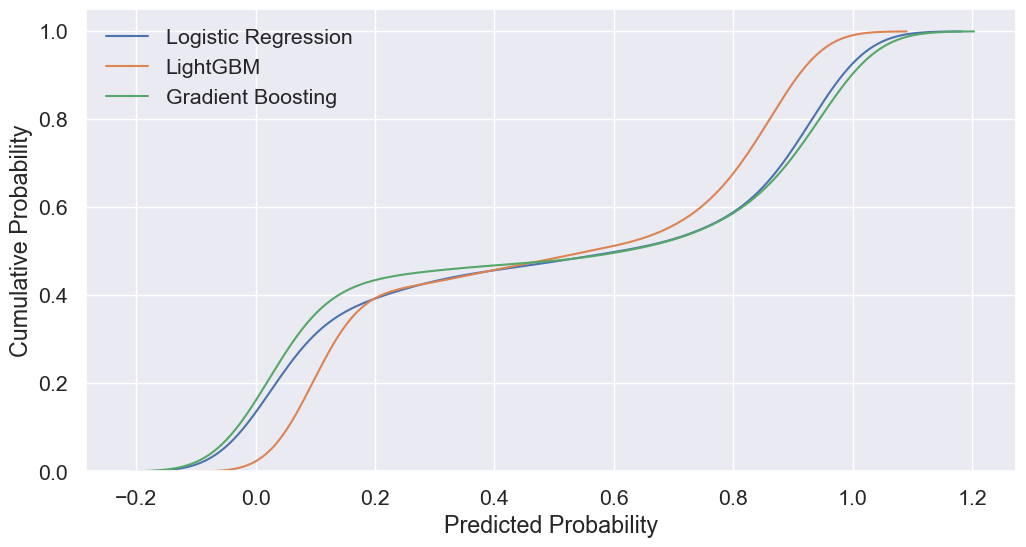

In [208]:
# Plotting CDFs of the predicted probabilities
plt.figure(figsize=(12, 6))

# Plot for Logistic Regression
sns.kdeplot(prob_logreg, cumulative=True, label='Logistic Regression', bw_adjust=0.5)

# Plot for LightGBM
sns.kdeplot(prob_lgbm, cumulative=True, label='LightGBM', bw_adjust=0.5)

# Plot for Gradient Boosting
sns.kdeplot(prob_grad, cumulative=True, label='Gradient Boosting', bw_adjust=0.5)

# plt.title('Cumulative Distribution Functions of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()


Given the similar performance metrics and the KS test results showing significant differences, LightGBM edges out as the best model if the focus is purely on predictive power and handling complex data relationships. 
Logistic Regression is also excellent and might be preferable if model simplicity and interpretability are important.

## Clustering 

In order to understand and study the employees' risk of progressing to a mental health issue, a risk indicator was built. The risk indicator was modelled using various clustering techniques where the employees were fractionated into 3 clusters representing different levels of risk of the employees.
The following clustering models were implemented:
1. K means clustering
2. K means++
3. Partition around Medoids clustering
4. Agglomerative Hierarchical clustering
5. Agglomerative Hierarchical Clustering with Ward's linkage
6. Gaussian mixture models
7. Spectral clustering
8. Birch clustering
9. Optics Clustering
10. Affinity Propagation Clustering 

The following metrics were used to evaluate the performace of the above clustering models:
1. Silhouette score - Measures how similar an object is to its own cluster compared to other clusters. Higher is better.
2. Calinski Harabasz score - Ratio of the sum of between-cluster dispersion and within-cluster dispersion. Higher is better.
3. Davies-Bouldin Score - Measures the average similarity ratio of each cluster with its most similar cluster. Lower is better.




### 1. K Means Clustering

Silhouette score: 0.05576431236935102
Calinski Harabasz score: 31.07867267075601
Davies Bouldin score: 3.7473033662025195


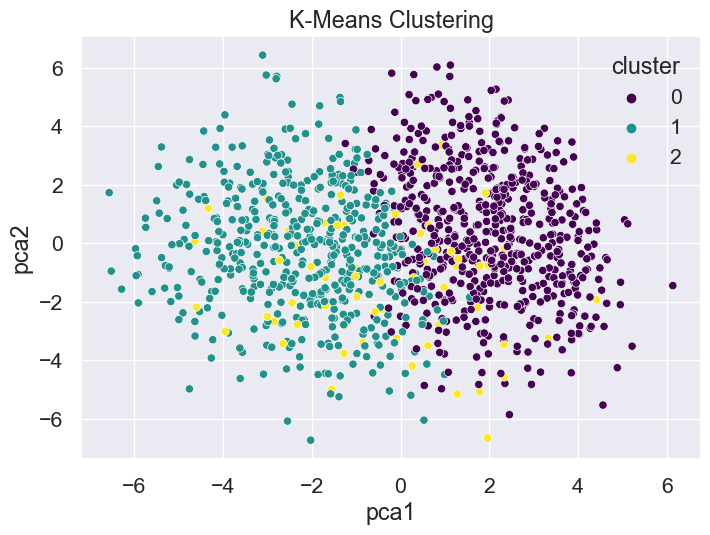

In [209]:
kmeans3 = KMeans(n_clusters=3, random_state=1).fit(df_scaled)
kmeans_labels3 = kmeans3.labels_
score1 = silhouette_score(df_scaled, kmeans_labels3, metric='euclidean')
score3 = calinski_harabasz_score(df_scaled, kmeans_labels3)
db_score = davies_bouldin_score(df_scaled, kmeans_labels3)

print("Silhouette score:", score1)
print('Calinski Harabasz score:', score3)
print('Davies Bouldin score:', db_score)

# Running PCA and reducing the dimensions
reduced_data = PCA(n_components=2).fit_transform(df_scaled)
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])
results['cluster'] = kmeans_labels3
palette = sns.color_palette("viridis", as_cmap=True)

# Plotting the clusters
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=results, palette=palette)
plt.title('K-Means Clustering')
plt.show()


### 2. K Means ++ Clustering

Silhouette score: 0.2065304403297509
Calinski Harabasz score: 523.1205306567155
Davies Bouldin score: 1.4962517593121827


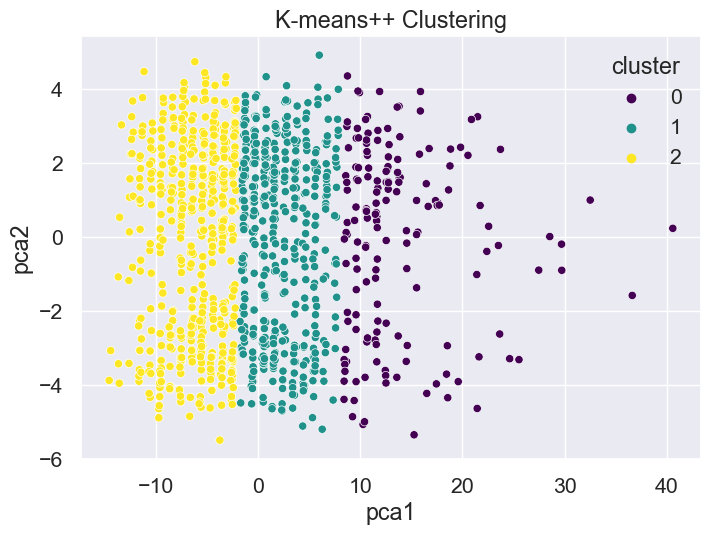

In [210]:
km_plus3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=1000).fit(df)
kmplus_labels3 = km_plus3.labels_
score1 = silhouette_score(df, kmplus_labels3, metric='euclidean')
score3 = calinski_harabasz_score(df, kmplus_labels3)
db_score = davies_bouldin_score(df, kmplus_labels3)

print("Silhouette score:", score1)
print('Calinski Harabasz score:', score3)
print('Davies Bouldin score:', db_score)

# Running PCA and reducing the dimensions
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])
results['cluster'] = kmplus_labels3
palette = sns.color_palette("viridis", as_cmap=True)

# Plotting the clusters
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=results, palette=palette)
plt.title('K-means++ Clustering')
plt.show()


### 3. K-Medoids / Partitioning Around Medoids (PAM)

Silhouette score: 0.17674160590458635
Calinski Harabasz score: 488.68561204223425
Davies Bouldin score: 1.6279326776747538


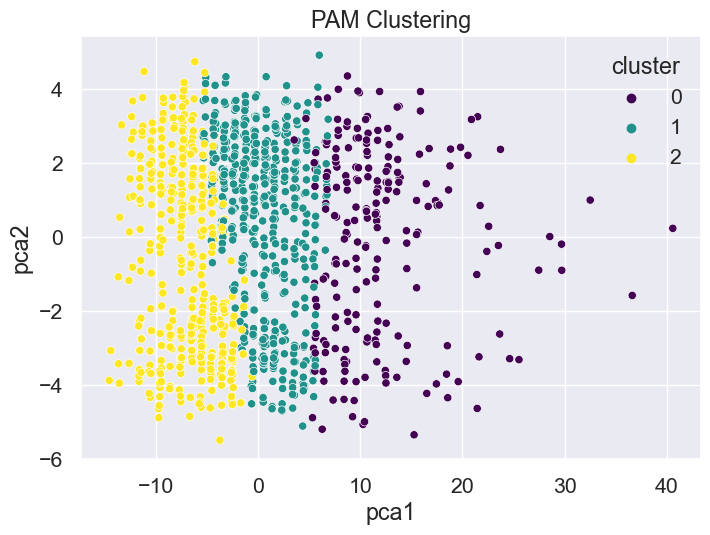

In [211]:
kmedoids_euc_3 = KMedoids(n_clusters=3, metric='euclidean', method='pam', init='k-medoids++', max_iter=300).fit(df)
kmedoids_euc_labels3 = kmedoids_euc_3.labels_

score1 = silhouette_score(df, kmedoids_euc_labels3, metric='euclidean')
score3 = calinski_harabasz_score(df, kmedoids_euc_labels3)
db_score = davies_bouldin_score(df, kmedoids_euc_labels3)

print("Silhouette score:", score1)
print('Calinski Harabasz score:', score3)
print('Davies Bouldin score:', db_score)

# Running PCA and reducing dimensions
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])
results['cluster'] = kmedoids_euc_labels3
palette = sns.color_palette("viridis", as_cmap=True)

# Plotting the clusters
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=results, palette=palette)
plt.title('PAM Clustering')
plt.show()


### 4. Agglomorative Heirarchy Clustering

Silhouette score: 0.18616306629895982
Calinski Harabasz score: 472.7940771672618
Davies Bouldin score: 1.5659437805200838


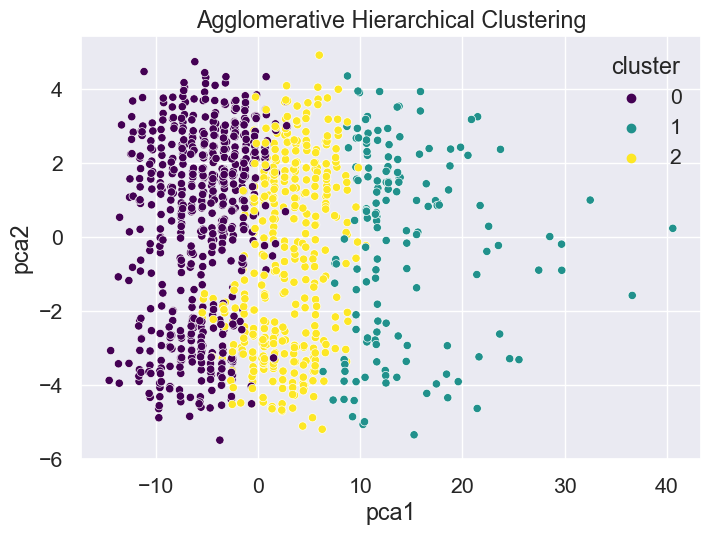

In [212]:
agglomerative_model = AgglomerativeClustering(n_clusters=3).fit(df)
agg_labels = agglomerative_model.labels_

score1 = silhouette_score(df, agg_labels, metric='euclidean')
score3 = calinski_harabasz_score(df, agg_labels)
db_score = davies_bouldin_score(df, agg_labels)

print("Silhouette score:", score1)
print('Calinski Harabasz score:', score3)
print('Davies Bouldin score:', db_score)

# Running PCA and reducing the dimensions
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])
results['cluster'] = agg_labels
palette = sns.color_palette("viridis", as_cmap=True)

# Plotting the clusters
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=results, palette=palette)
plt.title('Agglomerative Hierarchical Clustering')
plt.show()


### 5. Agglomerative Hierarchical Clustering with Ward's linkage

Agglomerative Clustering (Ward) - Silhouette score: 0.11993918725649132
Agglomerative Clustering (Ward) - Calinski Harabasz score: 28.298456834189118
Agglomerative Clustering (Ward) - Davies Bouldin score: 5.039996697556794


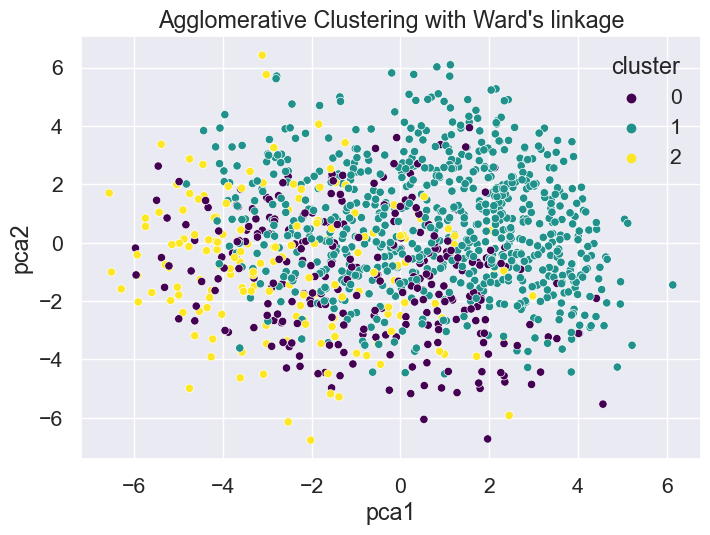

In [213]:
agglo_model = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(df_scaled)
agglo_labels = agglo_model.labels_
score1 = silhouette_score(df_scaled, agglo_labels)
score3 = calinski_harabasz_score(df_scaled, agglo_labels)
db_score = davies_bouldin_score(df_scaled, agglo_labels)
print("Agglomerative Clustering (Ward) - Silhouette score:", score1)
print('Agglomerative Clustering (Ward) - Calinski Harabasz score:', score3)
print('Agglomerative Clustering (Ward) - Davies Bouldin score:', db_score)

# Running PCA and reducing dimensions
reduced_data = PCA(n_components=2).fit_transform(df_scaled)
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])
results['cluster'] = agglo_labels
palette = sns.color_palette("viridis", as_cmap=True)

# Plotting the clusters
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=results, palette=palette)
plt.title('Agglomerative Clustering with Ward\'s linkage')
plt.show()


### 6. Gaussian Mixture Models

Silhouette score: -0.14577807160768663
Calinski Harabasz score: 11.542401543482514
Davies Bouldin score: 5.959908134845963


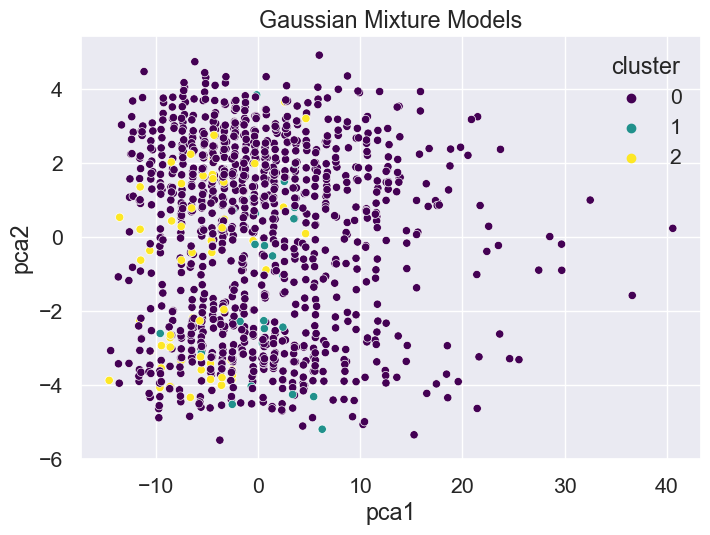

In [214]:
gmm_model3 = GaussianMixture(n_components=3).fit(df)
gmm_labels3 = gmm_model3.predict(df)

score1 = silhouette_score(df, gmm_labels3, metric='euclidean')
score3 = calinski_harabasz_score(df, gmm_labels3)
db_score = davies_bouldin_score(df, gmm_labels3)

print("Silhouette score:", score1)
print('Calinski Harabasz score:', score3)
print('Davies Bouldin score:', db_score)

# Running PCA and reducing dimensions
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])
results['cluster'] = gmm_labels3
palette = sns.color_palette("viridis", as_cmap=True)

# Plotting the clusters
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=results, palette=palette)
plt.title('Gaussian Mixture Models')
plt.show()


### 7. Spectral Clustering

Silhouette score: 0.23023219487106308
Calinski Harabasz score: 464.7657034203658
Davies Bouldin score: 1.2743450483847283


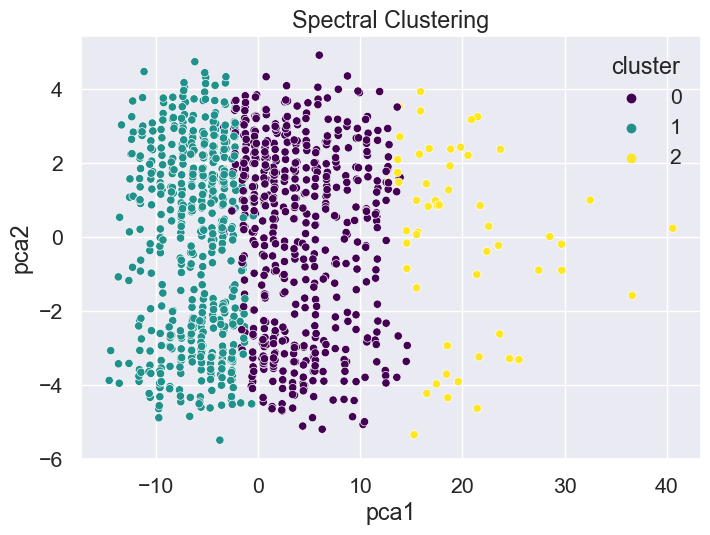

In [215]:
spectral_cluster_model3 = SpectralClustering(n_clusters=3, random_state=25, n_neighbors=8, affinity='nearest_neighbors').fit(df)
sc_labels3 = spectral_cluster_model3.labels_

score1 = silhouette_score(df, sc_labels3, metric='euclidean')
score3 = calinski_harabasz_score(df, sc_labels3)
db_score = davies_bouldin_score(df, sc_labels3)

print("Silhouette score:", score1)
print('Calinski Harabasz score:', score3)
print('Davies Bouldin score:', db_score)

# Running PCA
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])
results['cluster'] = sc_labels3
palette = sns.color_palette("viridis", as_cmap=True)

# Plotting the clusters
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=results, palette=palette)
plt.title('Spectral Clustering')
plt.show()


### 8. Birch Clustering

Silhouette score: 0.1673583468131054
Calinski Harabasz score: 470.9546471839804
Davies Bouldin score: 1.6776571483838707


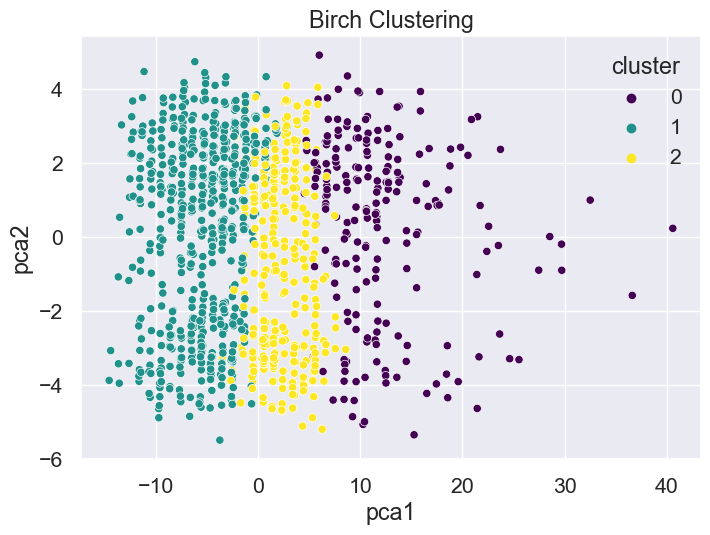

In [216]:
birch_model = Birch(threshold=0.03, n_clusters=3).fit(df)
birch_labels3 = birch_model.labels_

score1 = silhouette_score(df, birch_labels3, metric='euclidean')
score3 = calinski_harabasz_score(df, birch_labels3)
db_score = davies_bouldin_score(df, birch_labels3)

print("Silhouette score:", score1)
print('Calinski Harabasz score:', score3)
print('Davies Bouldin score:', db_score)

# Running PCA 
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])
results['cluster'] = birch_labels3
palette = sns.color_palette("viridis", as_cmap=True)

# Plotting the clusters
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=results, palette=palette)
plt.title('Birch Clustering')
plt.show()


### 9. Optics Clustering

OPTICS - Silhouette score: 0.3916986853842342
OPTICS - Calinski Harabasz score: 24.44311053685071
OPTICS - Davies Bouldin score: 6.13676153877211


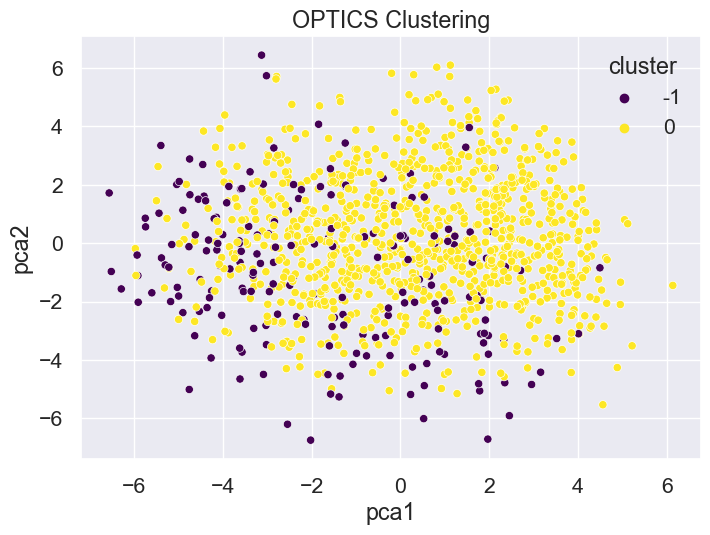

In [217]:
optics_model = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1).fit(df_scaled)
optics_labels = optics_model.labels_

if len(set(optics_labels)) > 1:
    score1 = silhouette_score(df_scaled, optics_labels)
    score3 = calinski_harabasz_score(df_scaled, optics_labels)
    db_score = davies_bouldin_score(df_scaled, optics_labels)
    print("OPTICS - Silhouette score:", score1)
    print('OPTICS - Calinski Harabasz score:', score3)
    print('OPTICS - Davies Bouldin score:', db_score)

    # Running PCA and reducing dimensions
    reduced_data = PCA(n_components=2).fit_transform(df_scaled)
    results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])
    results['cluster'] = optics_labels
    palette = sns.color_palette("viridis", as_cmap=True)

    # Plotting the clusters
    sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=results, palette=palette)
    plt.title('OPTICS Clustering')
    plt.show()

### 10. Affinity Propagation Clustering

Affinity Propagation - Silhouette score: 0.07864657793648948
Affinity Propagation - Calinski Harabasz score: 35.65882977559151
Affinity Propagation - Davies Bouldin score: 1.7530515480266118


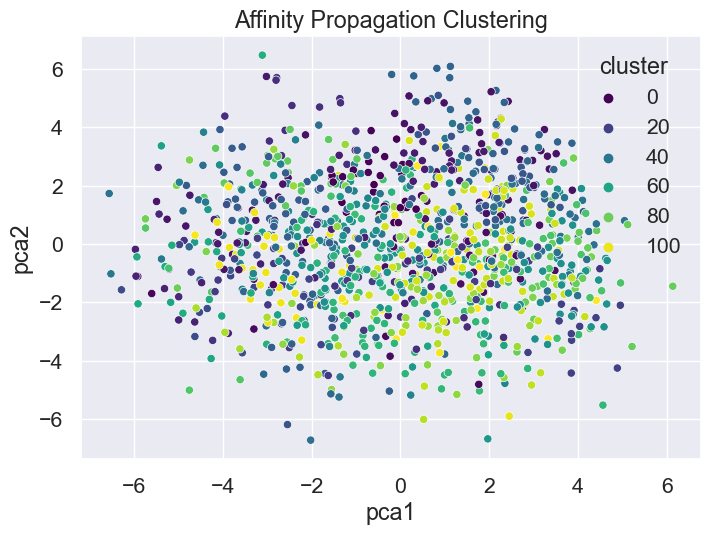

In [218]:
affinity_model = AffinityPropagation(random_state=1).fit(df_scaled)
affinity_labels = affinity_model.labels_

score1 = silhouette_score(df_scaled, affinity_labels)
score3 = calinski_harabasz_score(df_scaled, affinity_labels)
db_score = davies_bouldin_score(df_scaled, affinity_labels)
print("Affinity Propagation - Silhouette score:", score1)
print('Affinity Propagation - Calinski Harabasz score:', score3)
print('Affinity Propagation - Davies Bouldin score:', db_score)

# Performing PCA on the data and reducing the dimensions
reduced_data = PCA(n_components=2).fit_transform(df_scaled)
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])
results['cluster'] = affinity_labels
palette = sns.color_palette("viridis", as_cmap=True)

# Plotting the clusters
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=results, palette=palette)
plt.title('Affinity Propagation Clustering')
plt.show()


In [219]:
# Printing the results in a table
data = {
    'Clustering Method': [
        'K-Means', 
        'K-Means++', 
        'K-Medoids (PAM)', 
        'Agglomerative Hierarchical', 
        'Agglomerative Hierarchical with Wards Linkage', 
        'Gaussian Mixture Models', 
        'Spectral Clustering', 
        'Birch Clustering', 
        'Optics Clustering', 
        'Affinity Propagation'
    ],
    'Silhouette Score': [
        0.055764, 0.206530, 0.176742, 0.186163, 0.119939, -0.145778, 0.230232, 0.167358, 0.391699, 0.078647
    ],
    'Calinski Harabasz Score': [
        31.078673, 523.120531, 488.685612, 472.794077, 28.298457, 11.542402, 464.765703, 470.954647, 24.443111, 35.658830
    ],
    'Davies Bouldin Score': [
        3.747303, 1.496252, 1.627933, 1.565944, 5.039997, 5.959908, 1.274345, 1.677657, 6.136762, 1.753052
    ]
}

df_result = pd.DataFrame(data)
df_result


Clustering Method  Silhouette Score  \
0                                        K-Means          0.055764   
1                                      K-Means++          0.206530   
2                                K-Medoids (PAM)          0.176742   
3                     Agglomerative Hierarchical          0.186163   
4  Agglomerative Hierarchical with Wards Linkage          0.119939   
5                        Gaussian Mixture Models         -0.145778   
6                            Spectral Clustering          0.230232   
7                               Birch Clustering          0.167358   
8                              Optics Clustering          0.391699   
9                           Affinity Propagation          0.078647   

   Calinski Harabasz Score  Davies Bouldin Score  
0                31.078673              3.747303  
1               523.120531              1.496252  
2               488.685612              1.627933  
3               472.794077              1.565944  
4                28.298457              5.039997  
5                11.542402              5.959908  
6               464.765703              1.274345  
7               470.954647              1.677657  
8                24.443111              6.136762  
9                35.658830              1.753052

Given that the Silhouette score provides a good balance between cluster cohesion and separation, and Spectral Clustering has a good balance across all metrics with a relatively high Silhouette score and the lowest Davies Bouldin score, Spectral Clustering can be considered the best overall method for this dataset.

### RISK SCORE CALCULATION

Inferences were made on the following:
1. Impact of Family History
2. Impact of Past Mental Health Disorders
3. Impact of Age
4. Impact of Gender
5. Impact of Workplace social support
6. Unsupportiveness towards mental health
7. Impact of Work Stress Levels


In [220]:
#Calculating risk scores for each cluster using the classifications for curr_mh and diagnosed_prof
#we make 3 different clusters
#sc_labels3
#kmplus_labels3
cluster1 = [x[0] for x, value in np.ndenumerate(sc_labels3) if value==0]
cluster2=[x[0] for x, value in np.ndenumerate(sc_labels3) if value==1]
cluster3=[x[0] for x, value in np.ndenumerate(sc_labels3) if value==2]
cluster1_risk=0
total_high=0
for i in range(len(cluster1)) :
    diagnosed=df.iloc[cluster1[i], 36]
    curr_mh=df.iloc[cluster1[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster1_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster1_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster1_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster1_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster1_risk+=0.25
cluster2_risk=0
for i in range(len(cluster2)) : 
    diagnosed=df.iloc[cluster2[i], 36]
    curr_mh=df.iloc[cluster2[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster2_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster2_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster2_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster2_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster2_risk+=0.25
cluster3_risk=0
for i in range(len(cluster3)) : 
    diagnosed=df.iloc[cluster3[i], 36]
    curr_mh=df.iloc[cluster3[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster3_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster3_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster3_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster3_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster3_risk+=0.25
#The risks for each cluster are used to identify which cluster is high, low, med
print('cluster1:',cluster1_risk)
print('cluster2:',cluster2_risk)
print('cluster3:',cluster3_risk)
print(cluster1)
print(cluster2)
print(cluster3)

cluster1: 1582.0
cluster2: 1467.0
cluster3: 153.75
[0, 2, 3, 4, 6, 7, 9, 11, 12, 14, 15, 18, 20, 21, 23, 24, 25, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 47, 48, 49, 50, 53, 58, 59, 60, 61, 62, 64, 66, 67, 68, 69, 70, 72, 73, 75, 78, 79, 81, 86, 87, 94, 95, 96, 100, 101, 102, 103, 104, 106, 107, 108, 110, 112, 113, 115, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 130, 131, 134, 135, 136, 137, 139, 140, 141, 145, 148, 149, 152, 154, 155, 156, 157, 161, 162, 163, 164, 165, 166, 172, 173, 174, 176, 178, 186, 187, 191, 198, 203, 206, 207, 209, 211, 212, 215, 217, 218, 221, 222, 223, 225, 226, 231, 232, 233, 235, 241, 243, 246, 250, 252, 253, 259, 262, 263, 264, 266, 270, 272, 277, 279, 280, 284, 287, 288, 292, 294, 297, 301, 302, 303, 305, 306, 308, 311, 312, 314, 315, 316, 321, 322, 324, 326, 329, 331, 332, 333, 337, 338, 339, 342, 343, 346, 354, 355, 356, 361, 363, 364, 368, 371, 377, 378, 381, 382, 384, 385, 386, 390, 392, 394, 395, 399, 400, 404, 405, 408, 409, 410, 41

In [221]:
#Classifying clusters as high, row and medium risks using cluster risks
import sys
cluster_risks=[[cluster1,cluster1_risk],[cluster2,cluster2_risk],[cluster3,cluster3_risk]]
high_risk=0
total=3
low_risk = sys.maxsize
high_risk_index=0
low_risk_index=0
high_risk_class=cluster_risks[0][0]
low_risk_class=cluster_risks[0][0]
for i in range(0,len(cluster_risks)):
    if(high_risk<=cluster_risks[i][1]):
        high_risk_class=cluster_risks[i][0]
        high_risk_index=i
        high_risk=cluster_risks[i][1]
total-=high_risk_index
print(total)
for i in range(0,len(cluster_risks)):
    if(low_risk>=cluster_risks[i][1]):
        low_risk_class=cluster_risks[i][0]
        low_risk_index = i
        low_risk=cluster_risks[i][1]
total = total - low_risk_index
med_risk_class=cluster_risks[total][0]
print(high_risk_class)
print(med_risk_class)
print(low_risk_class) 

3
[0, 2, 3, 4, 6, 7, 9, 11, 12, 14, 15, 18, 20, 21, 23, 24, 25, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 47, 48, 49, 50, 53, 58, 59, 60, 61, 62, 64, 66, 67, 68, 69, 70, 72, 73, 75, 78, 79, 81, 86, 87, 94, 95, 96, 100, 101, 102, 103, 104, 106, 107, 108, 110, 112, 113, 115, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 130, 131, 134, 135, 136, 137, 139, 140, 141, 145, 148, 149, 152, 154, 155, 156, 157, 161, 162, 163, 164, 165, 166, 172, 173, 174, 176, 178, 186, 187, 191, 198, 203, 206, 207, 209, 211, 212, 215, 217, 218, 221, 222, 223, 225, 226, 231, 232, 233, 235, 241, 243, 246, 250, 252, 253, 259, 262, 263, 264, 266, 270, 272, 277, 279, 280, 284, 287, 288, 292, 294, 297, 301, 302, 303, 305, 306, 308, 311, 312, 314, 315, 316, 321, 322, 324, 326, 329, 331, 332, 333, 337, 338, 339, 342, 343, 346, 354, 355, 356, 361, 363, 364, 368, 371, 377, 378, 381, 382, 384, 385, 386, 390, 392, 394, 395, 399, 400, 404, 405, 408, 409, 410, 411, 412, 416, 417, 419, 422, 424, 426, 428, 429, 4

In [222]:
print(high_risk_index)
print(low_risk_index)

0
2


In [223]:
tot_high_risk=len(high_risk_class)
tot_med_risk=len(med_risk_class)
tot_low_risk=len(low_risk_class)

## Inferences made from the Cluster analysis

In [224]:
#Inferences
#Effect of family history (col no=33)
fam_hist_high=0;
no_fam_hist_high=0;
for i in range(len(high_risk_class)) :

        if(df.iloc[high_risk_class[i],33]==2):
            fam_hist_high+=1
        if(df.iloc[high_risk_class[i],33]==0):
            no_fam_hist_high+=1

fam_hist_med=0;
no_fam_hist_med=0
for i in range(len(med_risk_class)) :

        if(df.iloc[med_risk_class[i],33]==2):
            fam_hist_med+=1
        if(df.iloc[med_risk_class[i],33]==0):
            no_fam_hist_med+=1
            
fam_hist_low=0;
no_fam_hist_low=0
for i in range(len(low_risk_class)) :

        if(df.iloc[low_risk_class[i],33]==2):
            fam_hist_low+=1
        if(df.iloc[low_risk_class[i],33]==0):
            no_fam_hist_low+=1
print(fam_hist_high)
print(fam_hist_med)
print(fam_hist_low)
print(no_fam_hist_high)
print(no_fam_hist_med)
print(no_fam_hist_low)

256
257
28
190
181
20


### 1. Impact of Family History

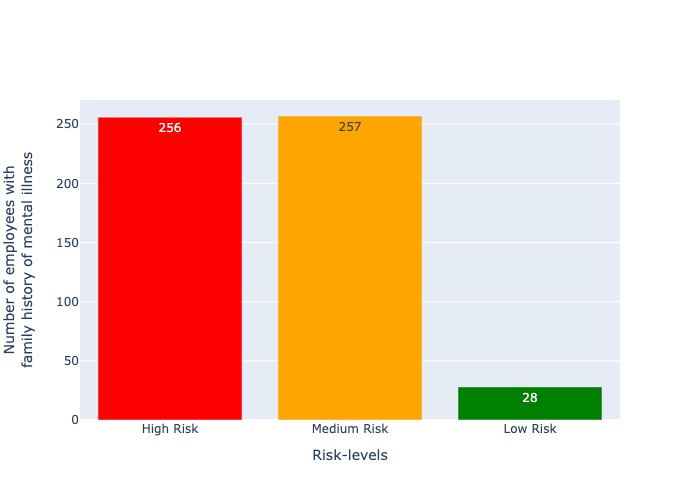

In [225]:
risks = ['High Risk', 'Medium Risk', 'Low Risk']
level = [fam_hist_high, fam_hist_med, fam_hist_low]
colors = ['red', 'orange', 'green']

fig = go.Figure(data=[go.Bar(name='Family history', x=risks, y=level, text=[str(x) for x in level],
                             marker=dict(color=colors))])

fig.update_layout(
    xaxis_title='Risk-levels',
    yaxis_title='Number of employees with<br>family history of mental illness'
)

fig.show("png")


### 2. Effect of Past Mental Health Disorders

In [226]:
l=[]
for i in range(len(high_risk_class)) :
        l.append(df.iloc[high_risk_class[i],34])

past_mh_high=Counter(l)[2]
l=[]
for i in range(len(low_risk_class)) :

        l.append(df.iloc[low_risk_class[i],31])

past_mh_low=Counter(l)[2]
l=[]
for i in range(len(med_risk_class)) :
        l.append(df.iloc[med_risk_class[i],31])
        

past_mh_med=Counter(l)[2]
print(Counter(l)[0])
print(Counter(l)[1])
print(Counter(l)[2])

44
31
84


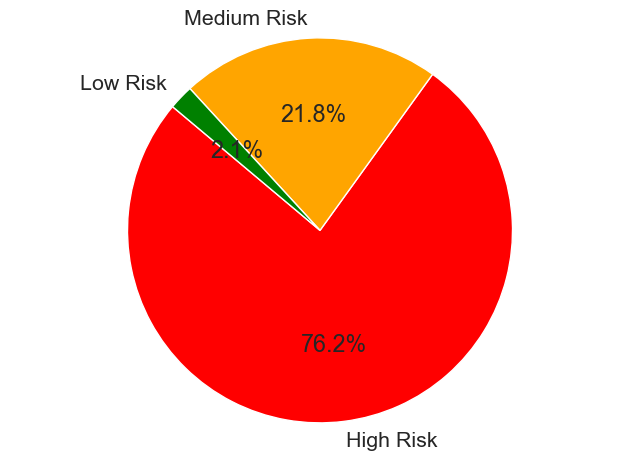

In [227]:
# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [past_mh_high, past_mh_med, past_mh_low]
colors = ['red', 'orange', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.savefig("past_mh_disorder_risk.jpg",bbox_inches='tight', dpi=150)
plt.show()

### 3.Impact of Age

In [228]:
tot_age_18_25=0
tot_age_26_45=0
tot_age_46_65=0
tot_age_66_75=0

age_18_25_high=0
age_18_25_med=0
age_18_25_low=0

age_26_45_high=0
age_26_45_med=0
age_26_45_low=0

age_46_65_high=0
age_46_65_med=0
age_46_65_low=0

age_66_75_high=0
age_66_75_med=0
age_66_75_low=0
for i in range(len(high_risk_class)) :
        if(df.iloc[high_risk_class[i],40]>=18 and df.iloc[high_risk_class[i],40]<=25): 
            tot_age_18_25+=1
            age_18_25_high+=1
        elif(df.iloc[high_risk_class[i],40]>=26 and df.iloc[high_risk_class[i],40]<=45):
          tot_age_26_45+=1
          age_26_45_high+=1
        elif(df.iloc[high_risk_class[i],40]>=46 and df.iloc[high_risk_class[i],40]<=65):
          tot_age_46_65+=1
          age_46_65_high+=1
        elif(df.iloc[high_risk_class[i],40]>=66 and df.iloc[high_risk_class[i],40]<=75):
          tot_age_66_75+=1
          age_66_75_high+=1
for i in range(len(med_risk_class)) :
        if(df.iloc[med_risk_class[i],40]>=18 and df.iloc[med_risk_class[i],40]<=25): 
            tot_age_18_25+=1
            age_18_25_med+=1
        elif(df.iloc[med_risk_class[i],40]>=26 and df.iloc[med_risk_class[i],40]<=45):
          tot_age_26_45+=1
          age_26_45_med+=1
        elif(df.iloc[med_risk_class[i],40]>=46 and df.iloc[med_risk_class[i],40]<=65):
          tot_age_46_65+=1
          age_46_65_med+=1
        elif(df.iloc[med_risk_class[i],40]>=66 and df.iloc[med_risk_class[i],40]<=75):
          tot_age_66_75+=1
          age_66_75_med+=1
for i in range(len(low_risk_class)) :
        if(df.iloc[low_risk_class[i],40]>=18 and df.iloc[low_risk_class[i],40]<=25): 
            tot_age_18_25+=1
            age_18_25_low+=1
        elif(df.iloc[low_risk_class[i],40]>=26 and df.iloc[low_risk_class[i],40]<=45):
          tot_age_26_45+=1
          age_26_45_low+=1
        elif(df.iloc[low_risk_class[i],40]>=46 and df.iloc[low_risk_class[i],40]<=65):
          tot_age_46_65+=1
          age_46_65_low+=1
        elif(df.iloc[low_risk_class[i],40]>=66 and df.iloc[low_risk_class[i],40]<=75):
          tot_age_66_75+=1
          age_66_75_low+=1


In [229]:
age_high = [age_18_25_high/tot_age_18_25,age_26_45_high/tot_age_26_45, age_46_65_high/tot_age_46_65, age_66_75_high/tot_age_66_75 ]
age_med = [age_18_25_med/tot_age_18_25, age_26_45_med/tot_age_26_45, age_46_65_med/tot_age_46_65, age_66_75_med/tot_age_66_75 ]
age_low = [age_18_25_low/tot_age_18_25, age_26_45_low/tot_age_26_45, age_46_65_low/tot_age_46_65, age_66_75_low/tot_age_66_75 ]

In [230]:
y1=[round(i*100,2) for i in age_high]
y2=[round(i*100,2) for i in age_med]
y3=[round(i*100,2) for i in age_low]

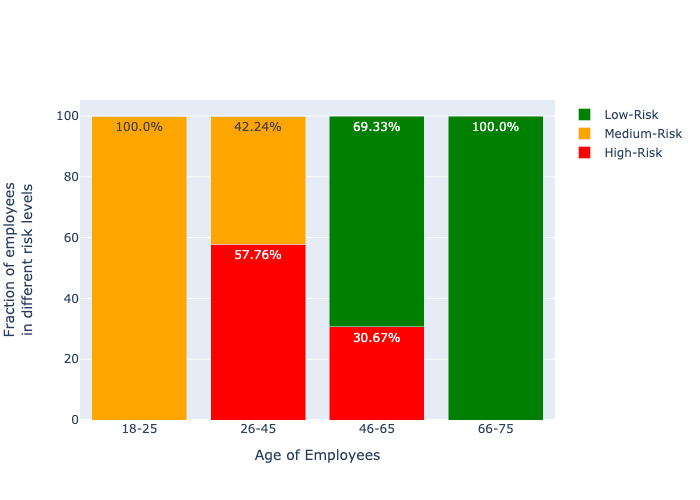

In [231]:

x =['18-25', '26-45', '46-65', '66-75']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y1, name='High-Risk',text=[str(x)+"%" for x in y1], marker_color='red'))
fig.add_trace(go.Bar(x=x, y=y2,name='Medium-Risk',text=[str(x)+"%"  for x in y2], marker_color='orange'))
fig.add_trace(go.Bar(x=x, y=y3,name='Low-Risk',text=[str(x)+"%"  for x in y3], marker_color='green'))
fig.update_layout(barmode='stack',  xaxis_title='Age of Employees', yaxis_title='Fraction of employees<br>in different risk levels')
#fig.savefig('rating_tech_supp.jpg')
fig.show("png")

### 4. Impact of Gender

In [232]:
l=[]
for i in range(len(high_risk_class)) :

        l.append(df.iloc[high_risk_class[i],41])

fem_high=Counter(l)[2]
l=[]
for i in range(len(med_risk_class)) :

        l.append(df.iloc[med_risk_class[i],31])
        

fem_med=Counter(l)[2]

l=[]
for i in range(len(low_risk_class)) :
        l.append(df.iloc[low_risk_class[i],31])
fem_low=Counter(l)[2]

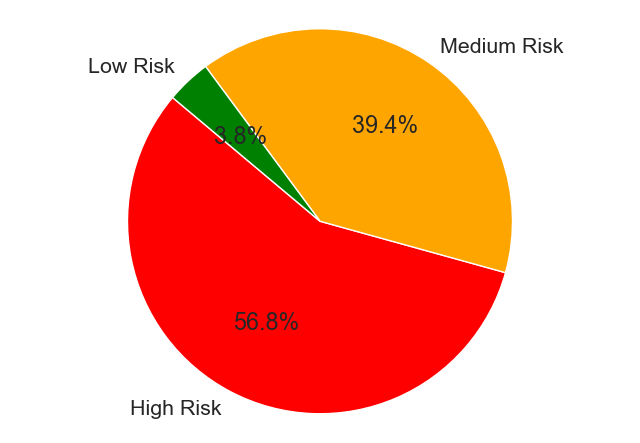

In [233]:
# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [fem_high, fem_med, fem_low]
colors = ['red', 'orange', 'green']
#explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.savefig("female_risk.jpg",bbox_inches='tight', dpi=150)
plt.show()

### 5. Impact of Workplace Social Support

<Figure size 1600x800 with 0 Axes>

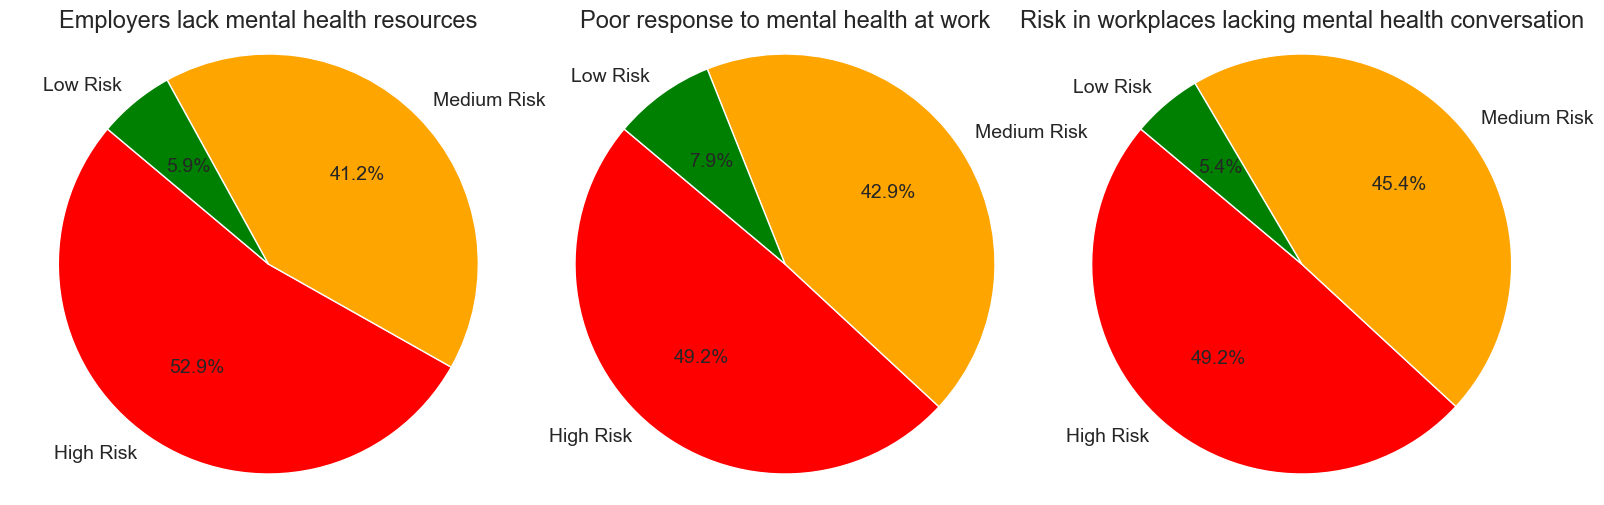

In [234]:
# Set font size for the entire plot
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8))

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(20)
plt.subplots_adjust(wspace=-0)

# For Europe
labels = ['High Risk', 'Medium Risk', 'Low Risk']
sizes = [126, 98, 14]
colors = ['red', 'orange', 'green']
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontsize': 14})
ax1.axis('equal')
ax1.set_title('Employers lack mental health resources', pad=3, fontsize=17)

# For America
sizes = [94, 82, 15]
ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontsize': 14})
ax2.axis('equal')
ax2.set_title('Poor response to mental health at work', pad=3, fontsize=17)

# For Asia, Africa, and Australia
sizes = [228, 210, 25]
ax3.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, textprops={'fontsize': 14})
ax3.axis('equal')
ax3.set_title('Risk in workplaces lacking mental health conversation', pad=3, fontsize=17)

plt.show()


### 6. Unsupportiveness Towards Mental Health

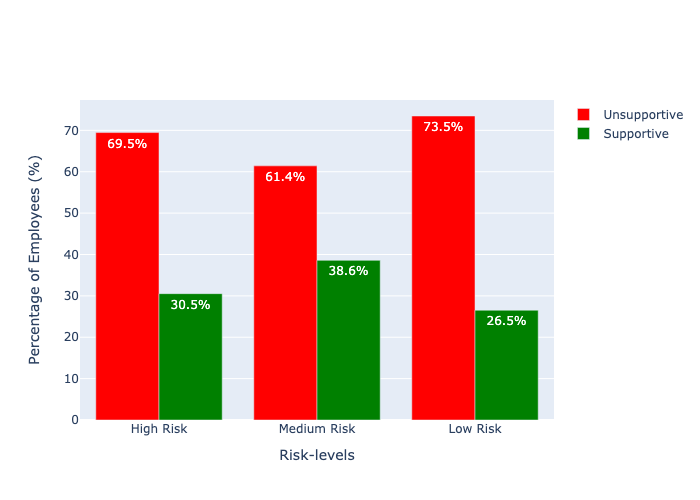

In [235]:
def count_unsupportiveness(risk_class, column_index):
    unsupportive, supportive = 0, 0
    for i in risk_class:
        if df.iloc[i, column_index] == 1:
            unsupportive += 1
        elif df.iloc[i, column_index] == 0:
            supportive += 1
    return unsupportive, supportive

unsupportive_high, supportive_high = count_unsupportiveness(high_risk_class, 44)
unsupportive_med, supportive_med = count_unsupportiveness(med_risk_class, 44)
unsupportive_low, supportive_low = count_unsupportiveness(low_risk_class, 44)

# Calculate total employees in each risk level
total_high = unsupportive_high + supportive_high
total_med = unsupportive_med + supportive_med
total_low = unsupportive_low + supportive_low

# Calculate percentages
unsupportive_levels_percentage = [
    (unsupportive_high / total_high) * 100,
    (unsupportive_med / total_med) * 100,
    (unsupportive_low / total_low) * 100
]

supportive_levels_percentage = [
    (supportive_high / total_high) * 100,
    (supportive_med / total_med) * 100,
    (supportive_low / total_low) * 100
]

unsupportive_text = [f'{p:.1f}%' for p in unsupportive_levels_percentage]
supportive_text = [f'{p:.1f}%' for p in supportive_levels_percentage]

# Create the grouped bar chart with percentages
fig = go.Figure(data=[
    go.Bar(name='Unsupportive', x=risks, y=unsupportive_levels_percentage, text=unsupportive_text, textposition='auto', marker_color='red'),
    go.Bar(name='Supportive', x=risks, y=supportive_levels_percentage, text=supportive_text, textposition='auto', marker_color='green')
])

# Update the layout to reflect the change to percentages
fig.update_layout(barmode='group', xaxis_title='Risk-levels', yaxis_title='Percentage of Employees (%)')
fig.show("png")


 ### 7. Impact of Work Stress Levels

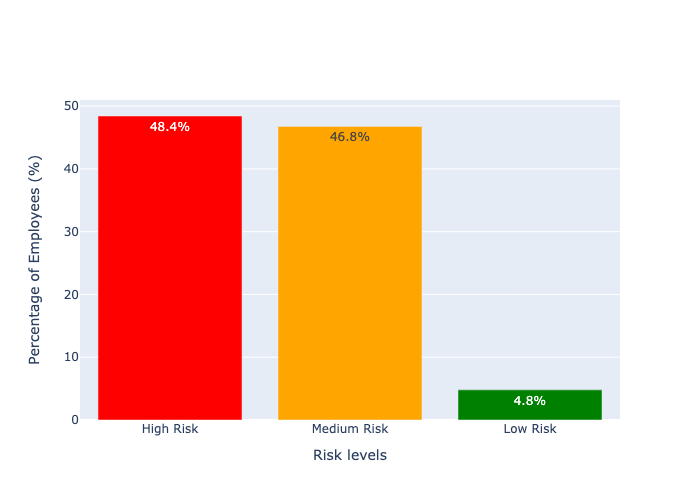

In [236]:
def calculate_stress_levels(risk_class, stress_column):
    low_stress, med_stress, high_stress = 0, 0, 0
    for i in risk_class:
        stress_level = df.iloc[i, stress_column]
        if stress_level == 0:
            low_stress += 1
        elif stress_level == 1:
            med_stress += 1
        elif stress_level == 2:
            high_stress += 1
    return low_stress, med_stress, high_stress

low_stress_high, med_stress_high, high_stress_high = calculate_stress_levels(high_risk_class, 50)
low_stress_med, med_stress_med, high_stress_med = calculate_stress_levels(med_risk_class, 50)
low_stress_low, med_stress_low, high_stress_low = calculate_stress_levels(low_risk_class, 50)

total_work_stress_high = low_stress_high + med_stress_high + high_stress_high
total_work_stress_med = low_stress_med + med_stress_med + high_stress_med
total_work_stress_low = low_stress_low + med_stress_low + high_stress_low

# Calculating the percentages
stress_levels_percentage = [
    (total_work_stress_high / (total_work_stress_high + total_work_stress_med + total_work_stress_low)) * 100,
    (total_work_stress_med / (total_work_stress_high + total_work_stress_med + total_work_stress_low)) * 100,
    (total_work_stress_low / (total_work_stress_high + total_work_stress_med + total_work_stress_low)) * 100
]


percentage_text = [f'{p:.1f}%' for p in stress_levels_percentage]
colors = ['red', 'orange', 'green']

# Creating the bar chart
fig = go.Figure(data=[go.Bar(name='Work Stress Levels', x=risks, y=stress_levels_percentage, 
                             text=percentage_text, textposition='auto',
                             marker=dict(color=colors))])
fig.update_layout(xaxis_title='Risk levels', yaxis_title='Percentage of Employees (%)')
fig.show("png")
